In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models_extended import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn_permute/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp_permute/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn_permute/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp_permute/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

permute_layer_list = [[], [0], [1], [2], [3]]
pre_act_permute_gcn_list = [False]
post_act_permute_gcn_list = [True]

#permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn


In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list


#permute
param_combinations["permute_layer_list"] = permute_layer_list
param_combinations["pre_act_permute_gcn_list"] = pre_act_permute_gcn_list
param_combinations["post_act_permute_gcn_list"] = post_act_permute_gcn_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

60


In [13]:
#permute_index=[], pre_act_permute_gcn=False, post_act_permute_gcn=False

run: 0
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB35BA760>, <torch.utils.data.dataset.Subset object at 0x0000024DB4BCF2E0>, <torch.utils.data.dataset.Subset object at 0x0000024DB4BCF430>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.072803624471029 | Validation Loss 4.18969863653183
Epoch 10 | Train Loss 3.2544848759969076 | Validation Loss 2.7191323041915894
Epoch 20 | Train Loss 2.4690990765889484 | Validation Loss 3.8323665857315063
Epoch 30 | Train Loss 1.814621106783549 | Validation Loss 2.2852513790130615
Epoch 40 | Train Loss 1.597417672475179 | Validation Loss 1.5354380011558533
Epoch 50 | Train Loss 1.417588186264038 | Validation Loss 1.4639349579811096
Epoch 60 | Train Loss 1.3370018283526102 | Validation Loss 1.2841998189687729
Epoch 70 | Train Loss 1.2088138699531554 | Validation Loss 1.2775415182113647
Epoch 80 | Train Loss 1.0942394733428955 | Validation Loss 1.154160976409912
Epoch 90 | Train Loss 1.0411910355091094 | Validation Loss 1.2722064852714539
Epoch 100 | Train Loss 1.0365275184313456 | Validation Loss 1.3117264211177826
Epoch 110 | Train Loss 0.7783504784107208 | Validation Loss 0.9905534088611603
Epoch 120 | Train Loss 1.0384833137194316 | Validation Loss 1.34176176

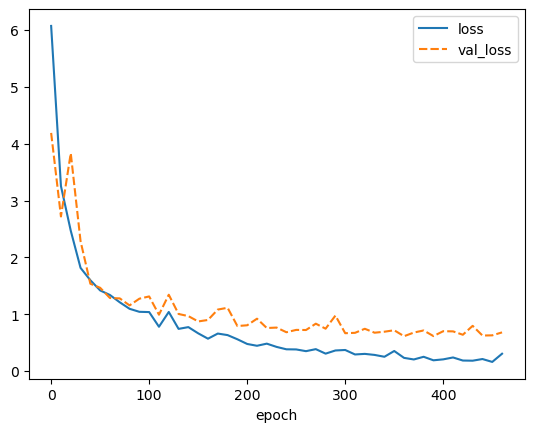

best weights loaded


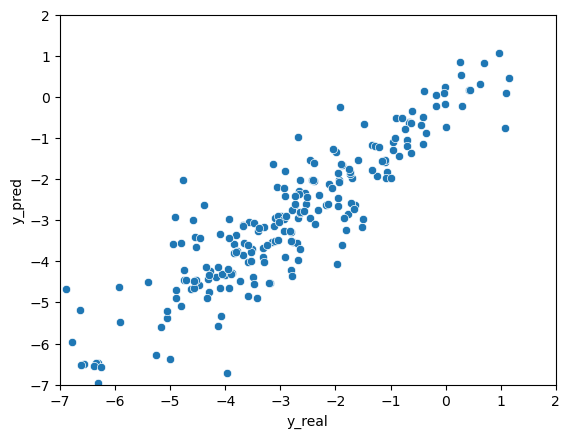

elapsed time: 129.04112768173218
run: 1
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3740130>, <torch.utils.data.dataset.Subset object at 0x0000024E5793A040>, <torch.utils.data.dataset.Subset object at 0x0000024E5793A550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.772043291727702 | Validation Loss 3.9441068172454834
Epoch 10 | Train Loss 4.468385712305705 | Validation Loss 3.93308424949646
Epoch 20 | Train Loss 4.52639118830363 | Validation Loss 3.280658543109894
Epoch 30 | Train Loss 3.879403313000997 | Validation Loss 3.479780614376068
Epoch 40 | Train Loss 4.050502808888753 | Validation Loss 3.2368423342704773
Epoch 50 | Train Loss 3.7139452854792276 | Validation Loss 3.1018764972686768
Epoch 60 | Train Loss 3.91062479019165 | Validation Loss 3.4556609392166138
Epoch 70 | Train Loss 3.516454315185547 | Validation Loss 3.274333953857422
Epoch 80 | Train Loss 4.081861511866252 | Validation Loss 2.999183177947998
Epoch 90 | Train Loss 3.4018141269683837 | Validation Loss 3.2402649521827698
Epoch 100 | Train Loss 3.1453744411468505 | Validation Loss 2.757427453994751
Epoch 110 | Train Loss 3.1060651779174804 | Validation Loss 2.62948340177536
Epoch 120 | Train Loss 2.8026123364766438 | Validation Loss 2.546426773071289
Epoc

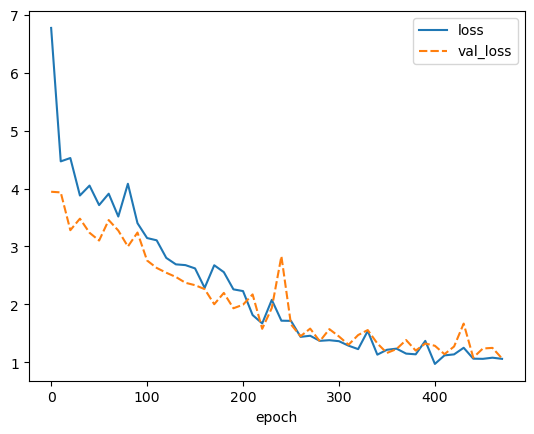

best weights loaded


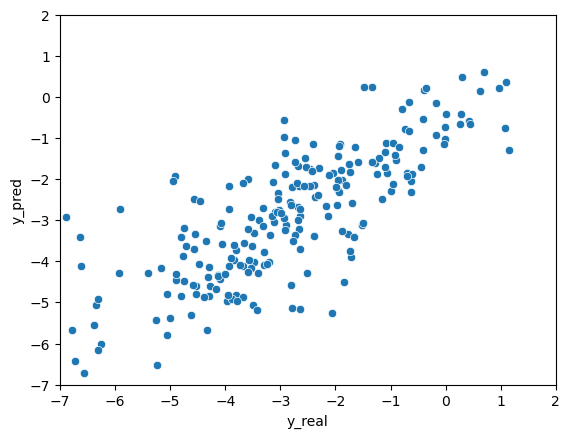

elapsed time: 133.90527892112732
run: 2
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB374D0D0>, <torch.utils.data.dataset.Subset object at 0x0000024DB378D400>, <torch.utils.data.dataset.Subset object at 0x0000024DB378DA60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.914392638206482 | Validation Loss 4.070314526557922
Epoch 10 | Train Loss 4.123231856028239 | Validation Loss 3.618865191936493
Epoch 20 | Train Loss 4.375255552927653 | Validation Loss 3.394436001777649
Epoch 30 | Train Loss 3.7197572867075603 | Validation Loss 2.8995805382728577
Epoch 40 | Train Loss 2.84960773785909 | Validation Loss 2.740529239177704
Epoch 50 | Train Loss 2.5666022300720215 | Validation Loss 2.294987201690674
Epoch 60 | Train Loss 2.4180322726567587 | Validation Loss 2.0294036865234375
Epoch 70 | Train Loss 2.1597697337468467 | Validation Loss 1.922419548034668
Epoch 80 | Train Loss 2.18103183110555 | Validation Loss 1.859109342098236
Epoch 90 | Train Loss 2.1496529817581176 | Validation Loss 2.0087852478027344
Epoch 100 | Train Loss 1.8342798471450805 | Validation Loss 1.71617192029953
Epoch 110 | Train Loss 1.6856070796648661 | Validation Loss 1.4738792777061462
Epoch 120 | Train Loss 1.6565551280975341 | Validation Loss 1.2029985040426254


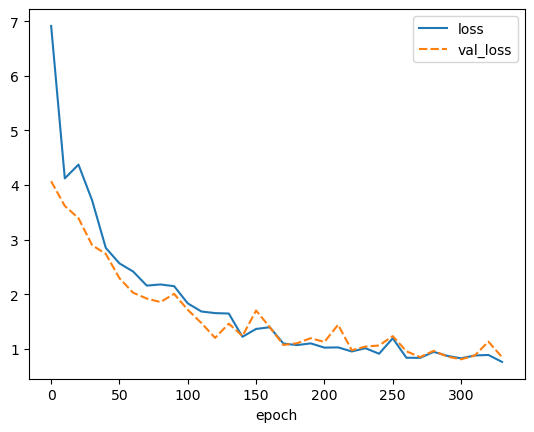

best weights loaded


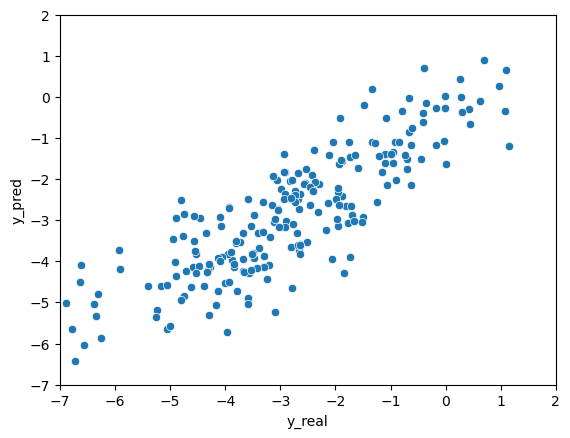

elapsed time: 104.93793821334839
run: 3
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB35B2FD0>, <torch.utils.data.dataset.Subset object at 0x0000024E57AF3AF0>, <torch.utils.data.dataset.Subset object at 0x0000024E57AF3EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.758086506525675 | Validation Loss 4.7641531229019165
Epoch 10 | Train Loss 3.8331823070844013 | Validation Loss 3.349451184272766
Epoch 20 | Train Loss 2.9466623862584433 | Validation Loss 2.803543984889984
Epoch 30 | Train Loss 2.782911205291748 | Validation Loss 2.4477026164531708
Epoch 40 | Train Loss 2.2170691172281902 | Validation Loss 2.455721825361252
Epoch 50 | Train Loss 1.8893732150395712 | Validation Loss 1.771413415670395
Epoch 60 | Train Loss 2.5522793769836425 | Validation Loss 2.223309576511383
Epoch 70 | Train Loss 1.791274873415629 | Validation Loss 1.6243856847286224
Epoch 80 | Train Loss 1.550473936398824 | Validation Loss 2.288100391626358
Epoch 90 | Train Loss 1.7318313717842102 | Validation Loss 1.8201376497745514
Epoch 100 | Train Loss 1.359510095914205 | Validation Loss 1.356109380722046
Epoch 110 | Train Loss 1.4651750326156616 | Validation Loss 1.2860923111438751
Epoch 120 | Train Loss 1.2936395525932312 | Validation Loss 1.7383074462413

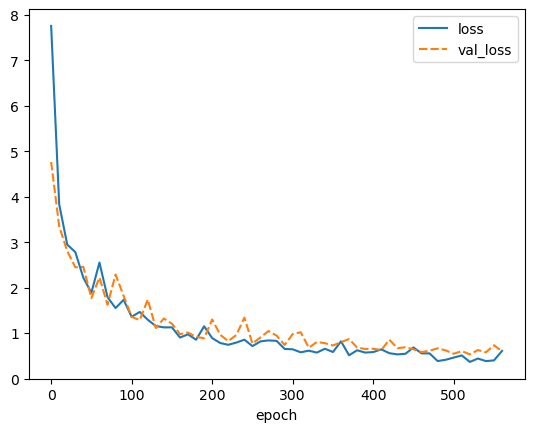

best weights loaded


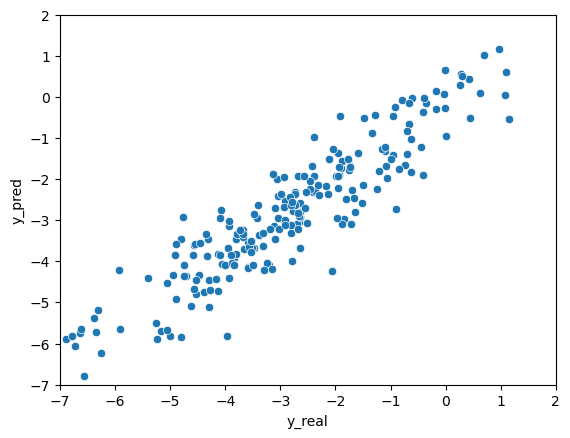

elapsed time: 181.73783946037292
run: 4
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB37DCA60>, <torch.utils.data.dataset.Subset object at 0x0000024E57C348E0>, <torch.utils.data.dataset.Subset object at 0x0000024E57C34DF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.161044279734293 | Validation Loss 7.221957087516785
Epoch 10 | Train Loss 4.124990971883138 | Validation Loss 3.585062265396118
Epoch 20 | Train Loss 3.1708577394485475 | Validation Loss 3.0781213641166687
Epoch 30 | Train Loss 3.0201241175333657 | Validation Loss 2.9925631880760193
Epoch 40 | Train Loss 2.5135476032892865 | Validation Loss 2.087110072374344
Epoch 50 | Train Loss 2.0296616077423097 | Validation Loss 1.7855487167835236
Epoch 60 | Train Loss 1.6162527203559875 | Validation Loss 1.5347067713737488
Epoch 70 | Train Loss 1.5591279824574789 | Validation Loss 1.812343716621399
Epoch 80 | Train Loss 1.3272560675938925 | Validation Loss 1.7181927859783173
Epoch 90 | Train Loss 1.2628331939379374 | Validation Loss 1.1700872629880905
Epoch 100 | Train Loss 1.241202143828074 | Validation Loss 1.8492430746555328
Epoch 110 | Train Loss 1.18131711880366 | Validation Loss 1.2067170590162277
Epoch 120 | Train Loss 1.1014196674029033 | Validation Loss 1.0984493046

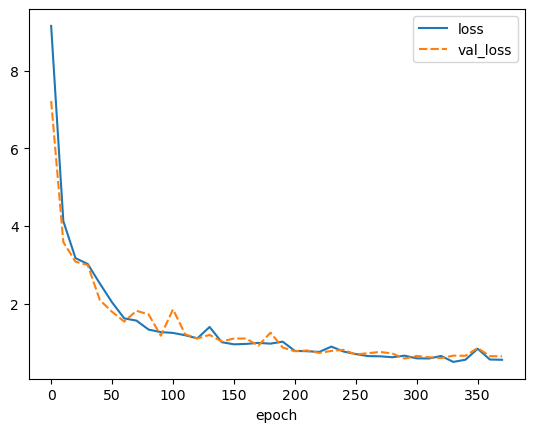

best weights loaded


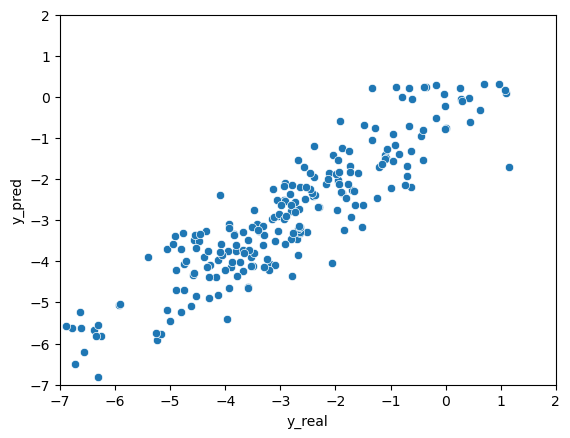

elapsed time: 120.08402585983276
run: 5
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB370C970>, <torch.utils.data.dataset.Subset object at 0x0000024DB3650B50>, <torch.utils.data.dataset.Subset object at 0x0000024DB3650130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.332400051752726 | Validation Loss 4.052573025226593
Epoch 10 | Train Loss 3.848594315846761 | Validation Loss 3.297199308872223
Epoch 20 | Train Loss 3.281337225437164 | Validation Loss 2.865469813346863
Epoch 30 | Train Loss 2.463081439336141 | Validation Loss 2.3777883648872375
Epoch 40 | Train Loss 1.9123863299687704 | Validation Loss 2.516759693622589
Epoch 50 | Train Loss 1.8778173267841338 | Validation Loss 2.568065583705902
Epoch 60 | Train Loss 1.869712487856547 | Validation Loss 1.99628147482872
Epoch 70 | Train Loss 1.307150936126709 | Validation Loss 1.2674029469490051
Epoch 80 | Train Loss 1.1998611529668173 | Validation Loss 1.5023764371871948
Epoch 90 | Train Loss 2.02973260084788 | Validation Loss 1.3611474633216858
Epoch 100 | Train Loss 1.1488908330599468 | Validation Loss 0.9612322747707367
Epoch 110 | Train Loss 1.1176634351412456 | Validation Loss 1.0103158503770828
Epoch 120 | Train Loss 1.0577394564946492 | Validation Loss 1.201083019375801


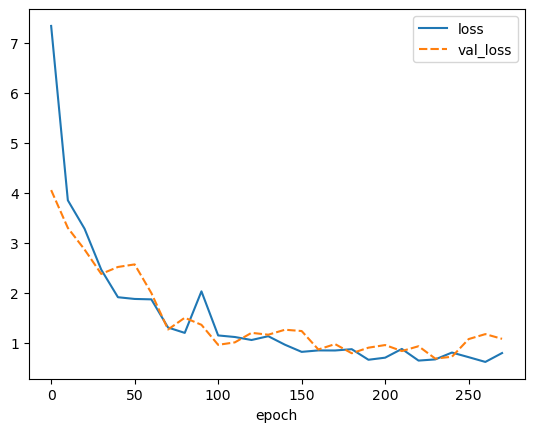

best weights loaded


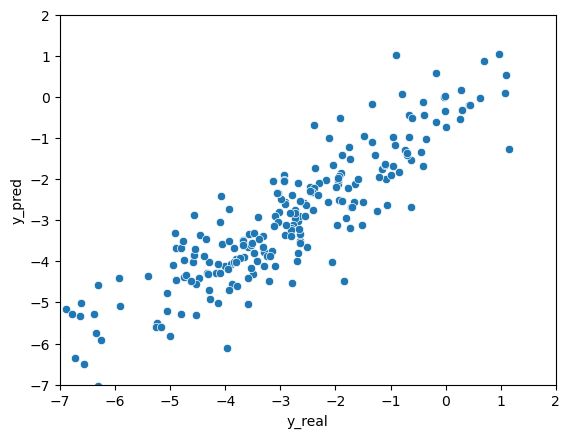

elapsed time: 79.69977068901062
run: 6
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB38098E0>, <torch.utils.data.dataset.Subset object at 0x0000024E57A54340>, <torch.utils.data.dataset.Subset object at 0x0000024E57A547C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.347380781173706 | Validation Loss 4.044747292995453
Epoch 10 | Train Loss 4.426665115356445 | Validation Loss 4.2503538727760315
Epoch 20 | Train Loss 4.583037932713826 | Validation Loss 3.7708675861358643
Epoch 30 | Train Loss 4.230663045247396 | Validation Loss 3.8086666464805603
Epoch 40 | Train Loss 4.5592526276906336 | Validation Loss 3.476971924304962
Epoch 50 | Train Loss 3.9818360805511475 | Validation Loss 3.296348452568054
Epoch 60 | Train Loss 3.7586844762166343 | Validation Loss 3.4593151807785034
Epoch 70 | Train Loss 3.7993106683095297 | Validation Loss 3.1852426528930664
Epoch 80 | Train Loss 3.7940743207931518 | Validation Loss 3.1396496295928955
Epoch 90 | Train Loss 3.519318135579427 | Validation Loss 3.392732262611389
Epoch 100 | Train Loss 3.5597378889719646 | Validation Loss 2.94193696975708
Epoch 110 | Train Loss 3.8437732537587483 | Validation Loss 3.0087692737579346
Epoch 120 | Train Loss 3.0564621369043987 | Validation Loss 2.667287468910

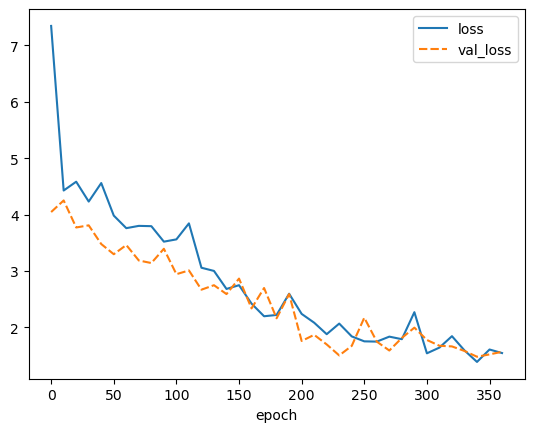

best weights loaded


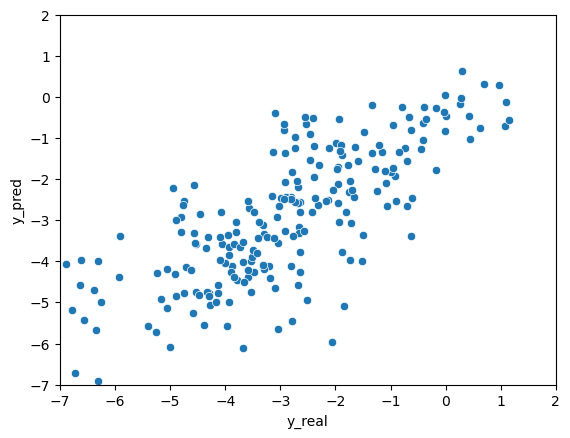

elapsed time: 106.40475702285767
run: 7
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB397AD90>, <torch.utils.data.dataset.Subset object at 0x0000024DB3681FA0>, <torch.utils.data.dataset.Subset object at 0x0000024DB3681100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.8057919104894005 | Validation Loss 4.392062783241272
Epoch 10 | Train Loss 4.054990180333456 | Validation Loss 3.5129445791244507
Epoch 20 | Train Loss 3.8234429995218915 | Validation Loss 3.39909964799881
Epoch 30 | Train Loss 3.265056530634562 | Validation Loss 3.2456144094467163
Epoch 40 | Train Loss 2.7167957107226055 | Validation Loss 2.6598891019821167
Epoch 50 | Train Loss 2.6375622749328613 | Validation Loss 2.4111538529396057
Epoch 60 | Train Loss 2.2998354117075603 | Validation Loss 2.3128071427345276
Epoch 70 | Train Loss 1.997452187538147 | Validation Loss 1.9865979850292206
Epoch 80 | Train Loss 1.8844119866689046 | Validation Loss 1.804806113243103
Epoch 90 | Train Loss 2.260036579767863 | Validation Loss 2.493183732032776
Epoch 100 | Train Loss 1.5608581443627676 | Validation Loss 1.7376808524131775
Epoch 110 | Train Loss 1.584869130452474 | Validation Loss 1.7471941411495209
Epoch 120 | Train Loss 1.5667823910713197 | Validation Loss 1.35981234908

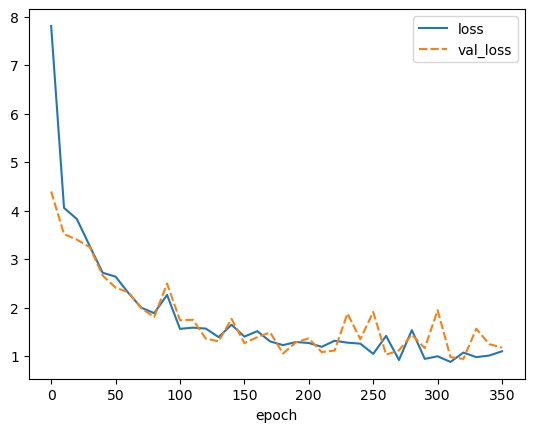

best weights loaded


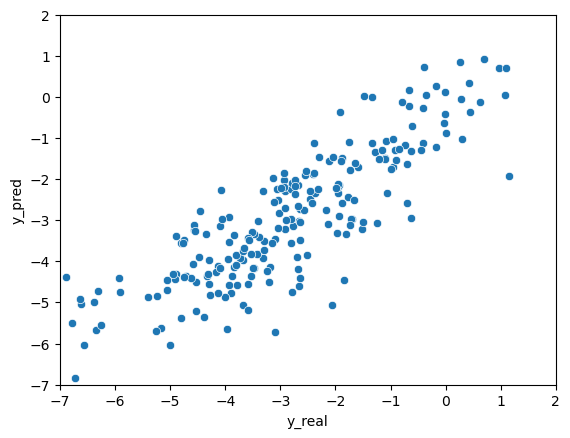

elapsed time: 92.09526753425598
run: 8
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB370C5E0>, <torch.utils.data.dataset.Subset object at 0x0000024E577EAB80>, <torch.utils.data.dataset.Subset object at 0x0000024E577EF0D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.344779173533121 | Validation Loss 5.6369545459747314
Epoch 10 | Train Loss 3.92701940536499 | Validation Loss 3.603611648082733
Epoch 20 | Train Loss 3.539875380198161 | Validation Loss 2.8831769824028015
Epoch 30 | Train Loss 2.5869739929835003 | Validation Loss 2.8044959902763367
Epoch 40 | Train Loss 2.011569356918335 | Validation Loss 1.8365376591682434
Epoch 50 | Train Loss 1.573867678642273 | Validation Loss 1.512735202908516
Epoch 60 | Train Loss 1.526835568745931 | Validation Loss 1.623003214597702
Epoch 70 | Train Loss 1.7773536562919616 | Validation Loss 1.7611153274774551
Epoch 80 | Train Loss 1.4124904612700144 | Validation Loss 1.3493261337280273
Epoch 90 | Train Loss 1.4276242395242056 | Validation Loss 1.299896776676178
Epoch 100 | Train Loss 1.6935357411702474 | Validation Loss 1.200023591518402
Epoch 110 | Train Loss 1.3160624424616496 | Validation Loss 1.2730085253715515
Epoch 120 | Train Loss 1.235989268620809 | Validation Loss 1.06813094019889

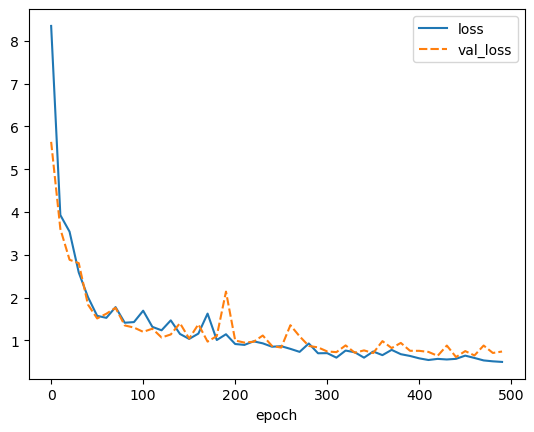

best weights loaded


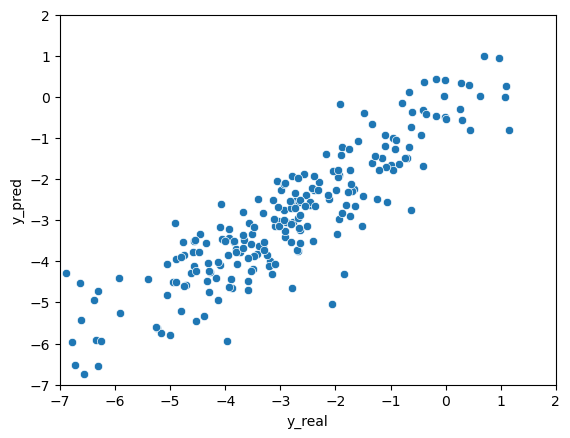

elapsed time: 126.54856586456299
run: 9
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3A492B0>, <torch.utils.data.dataset.Subset object at 0x0000024E57890A00>, <torch.utils.data.dataset.Subset object at 0x0000024E57890970>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 11.252975463867188 | Validation Loss 7.589423656463623
Epoch 10 | Train Loss 4.04650042851766 | Validation Loss 3.5761002898216248
Epoch 20 | Train Loss 4.001028203964234 | Validation Loss 3.2033702731132507
Epoch 30 | Train Loss 3.634148128827413 | Validation Loss 3.0328055024147034
Epoch 40 | Train Loss 3.1074411392211916 | Validation Loss 2.6786174178123474
Epoch 50 | Train Loss 2.842075721422831 | Validation Loss 2.255107134580612
Epoch 60 | Train Loss 1.8813153982162476 | Validation Loss 1.8093420565128326
Epoch 70 | Train Loss 2.1328142364819844 | Validation Loss 1.5146647989749908
Epoch 80 | Train Loss 1.8856437921524047 | Validation Loss 1.5771558284759521
Epoch 90 | Train Loss 1.9614607095718384 | Validation Loss 1.9525440335273743
Epoch 100 | Train Loss 1.4079158703486125 | Validation Loss 1.4393227100372314
Epoch 110 | Train Loss 1.314434822400411 | Validation Loss 1.5503334999084473
Epoch 120 | Train Loss 1.208380643526713 | Validation Loss 1.4885416924

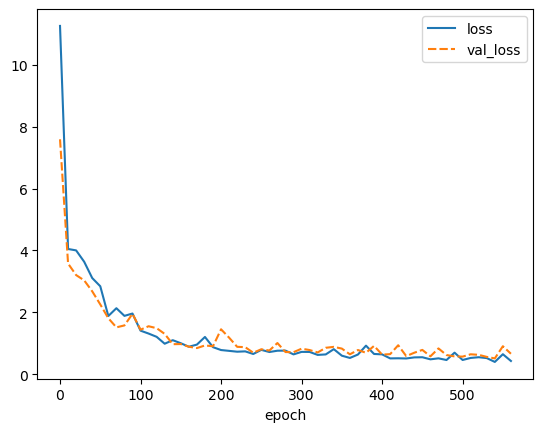

best weights loaded


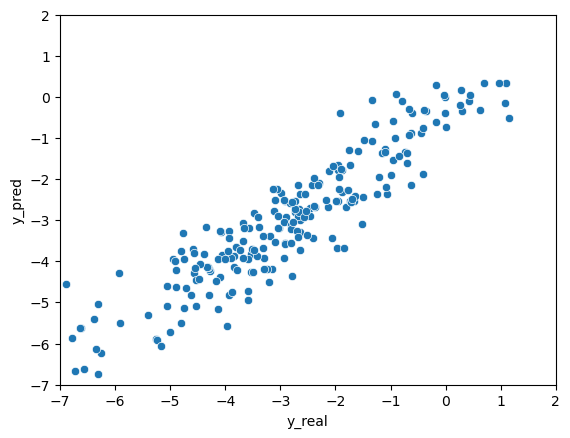

elapsed time: 138.4878969192505
run: 10
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC2B8A00>, <torch.utils.data.dataset.Subset object at 0x0000024DE9E43790>, <torch.utils.data.dataset.Subset object at 0x0000024DE9E43CA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.929434299468994 | Validation Loss 4.138055086135864
Epoch 10 | Train Loss 3.1225773811340334 | Validation Loss 3.5179723501205444
Epoch 20 | Train Loss 2.6020841121673586 | Validation Loss 2.8637808561325073
Epoch 30 | Train Loss 1.944279630978902 | Validation Loss 1.6670588254928589
Epoch 40 | Train Loss 1.4067828933397928 | Validation Loss 2.0756057500839233
Epoch 50 | Train Loss 1.3355345606803894 | Validation Loss 1.5262924134731293
Epoch 60 | Train Loss 1.1675099889437357 | Validation Loss 1.3129763156175613
Epoch 70 | Train Loss 1.0780298749605814 | Validation Loss 1.352505624294281
Epoch 80 | Train Loss 1.0429028113683065 | Validation Loss 1.0817670375108719
Epoch 90 | Train Loss 0.9172409375508627 | Validation Loss 1.0186373591423035
Epoch 100 | Train Loss 0.8637548724810282 | Validation Loss 1.131046712398529
Epoch 110 | Train Loss 0.7383277734120687 | Validation Loss 0.8960427790880203
Epoch 120 | Train Loss 0.8874209940433502 | Validation Loss 0.908327

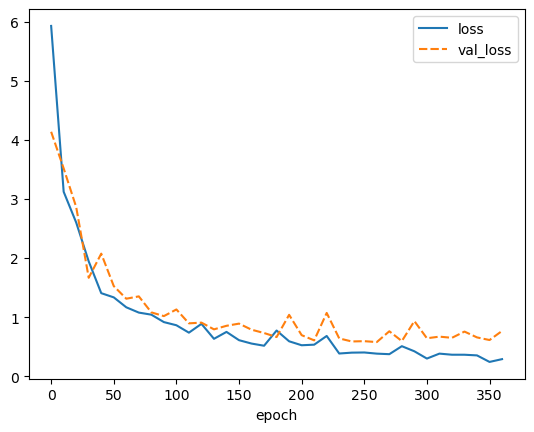

best weights loaded


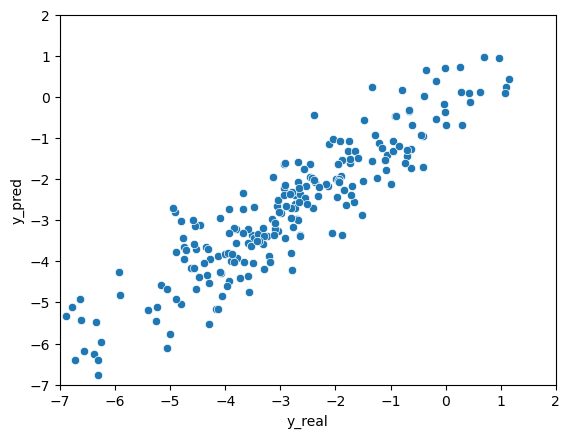

elapsed time: 104.25417375564575
run: 11
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC28B8B0>, <torch.utils.data.dataset.Subset object at 0x0000024DB365FB50>, <torch.utils.data.dataset.Subset object at 0x0000024DB365F9A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.467658996582031 | Validation Loss 3.9898089170455933
Epoch 10 | Train Loss 4.72829270362854 | Validation Loss 3.520974576473236
Epoch 20 | Train Loss 4.5329182306925455 | Validation Loss 3.314969003200531
Epoch 30 | Train Loss 4.188487037022909 | Validation Loss 3.30572909116745
Epoch 40 | Train Loss 3.9411635875701903 | Validation Loss 3.1181288957595825
Epoch 50 | Train Loss 3.855162525177002 | Validation Loss 3.279304087162018
Epoch 60 | Train Loss 4.0534259160359705 | Validation Loss 3.3849568367004395
Epoch 70 | Train Loss 3.67333779335022 | Validation Loss 3.069456160068512
Epoch 80 | Train Loss 3.5354666550954184 | Validation Loss 3.1648964881896973
Epoch 90 | Train Loss 3.521853876113892 | Validation Loss 2.9094956517219543
Epoch 100 | Train Loss 3.0348097244898478 | Validation Loss 2.7170912623405457
Epoch 110 | Train Loss 2.9584644158681233 | Validation Loss 2.5567710995674133
Epoch 120 | Train Loss 2.569312493006388 | Validation Loss 2.4073582887649536

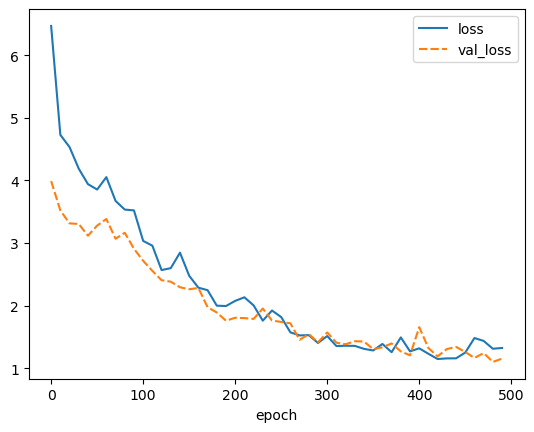

best weights loaded


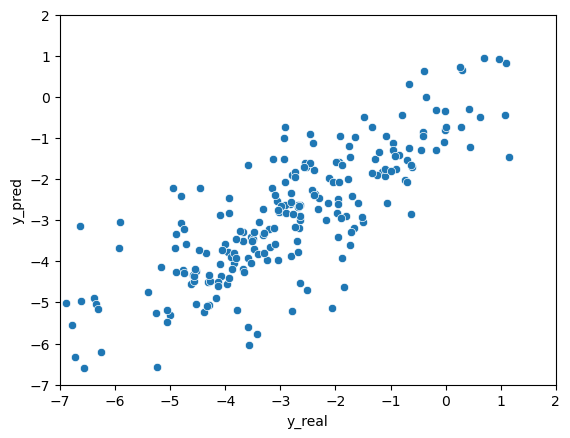

elapsed time: 140.22403144836426
run: 12
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4A84130>, <torch.utils.data.dataset.Subset object at 0x0000024E579BF970>, <torch.utils.data.dataset.Subset object at 0x0000024E579BFE80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.248685963948568 | Validation Loss 3.726636588573456
Epoch 10 | Train Loss 3.9789618492126464 | Validation Loss 3.544120192527771
Epoch 20 | Train Loss 3.7074549992879233 | Validation Loss 3.1774784922599792
Epoch 30 | Train Loss 3.6438992023468018 | Validation Loss 2.7722529768943787
Epoch 40 | Train Loss 3.174414889017741 | Validation Loss 2.7768208384513855
Epoch 50 | Train Loss 3.0573052406311034 | Validation Loss 2.3821430802345276
Epoch 60 | Train Loss 2.5814868291219075 | Validation Loss 2.5128983855247498
Epoch 70 | Train Loss 2.3672983487447103 | Validation Loss 2.8141443729400635
Epoch 80 | Train Loss 2.365890347957611 | Validation Loss 2.1995265781879425
Epoch 90 | Train Loss 2.1792431116104125 | Validation Loss 1.9387615621089935
Epoch 100 | Train Loss 1.8422390182813009 | Validation Loss 1.8732497096061707
Epoch 110 | Train Loss 1.9027231852213542 | Validation Loss 1.6613014042377472
Epoch 120 | Train Loss 2.092372941970825 | Validation Loss 1.6400143

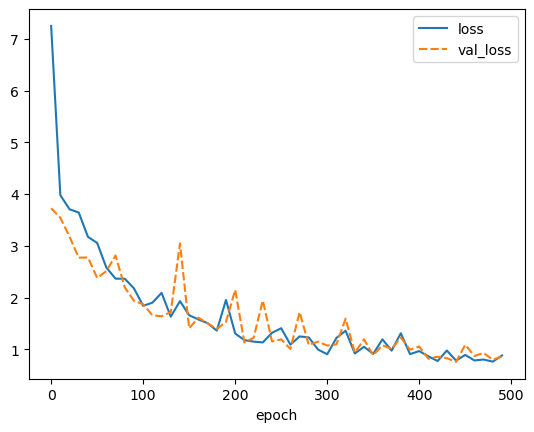

best weights loaded


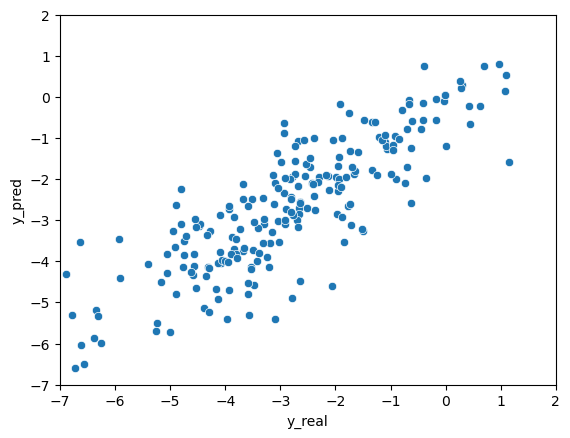

elapsed time: 141.94545531272888
run: 13
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB38DAD30>, <torch.utils.data.dataset.Subset object at 0x0000024DE9ECE550>, <torch.utils.data.dataset.Subset object at 0x0000024DE9ECEBE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.791001796722412 | Validation Loss 3.825602650642395
Epoch 10 | Train Loss 3.7903474013010663 | Validation Loss 3.1492977142333984
Epoch 20 | Train Loss 3.5007314999898274 | Validation Loss 2.991954028606415
Epoch 30 | Train Loss 3.106890344619751 | Validation Loss 2.608534038066864
Epoch 40 | Train Loss 2.4656448125839234 | Validation Loss 2.4611032009124756
Epoch 50 | Train Loss 2.593363563219706 | Validation Loss 2.5758121013641357
Epoch 60 | Train Loss 2.134958839416504 | Validation Loss 1.9934679567813873
Epoch 70 | Train Loss 2.077443734804789 | Validation Loss 2.0297826528549194
Epoch 80 | Train Loss 1.8182882110277812 | Validation Loss 1.8573611974716187
Epoch 90 | Train Loss 1.8722401181856791 | Validation Loss 2.04266020655632
Epoch 100 | Train Loss 1.5970555742581685 | Validation Loss 1.6332802772521973
Epoch 110 | Train Loss 1.5246339718500772 | Validation Loss 1.541376680135727
Epoch 120 | Train Loss 1.5386336008707682 | Validation Loss 1.693410784006

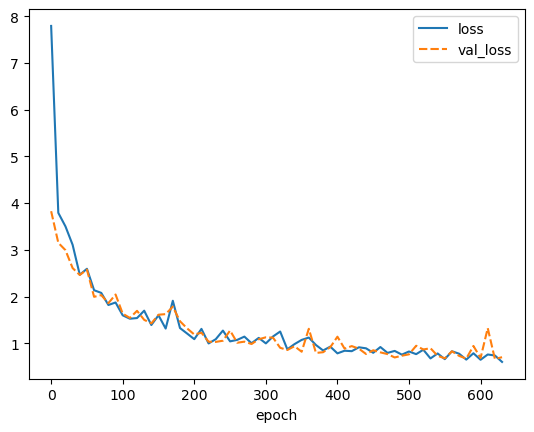

best weights loaded


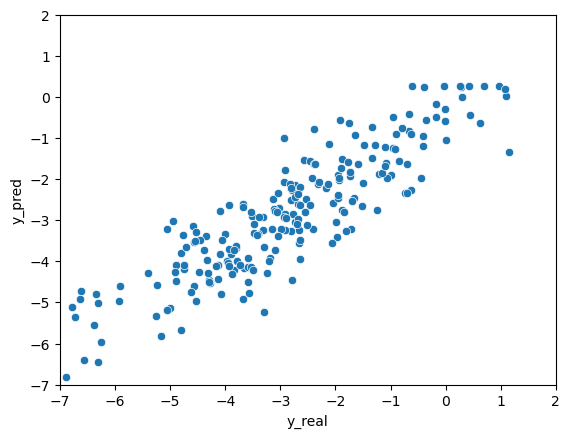

elapsed time: 174.37152338027954
run: 14
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E577CE7C0>, <torch.utils.data.dataset.Subset object at 0x0000024E57B01100>, <torch.utils.data.dataset.Subset object at 0x0000024E57B01610>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.359865554173787 | Validation Loss 4.113641858100891
Epoch 10 | Train Loss 4.409721008936564 | Validation Loss 3.105288088321686
Epoch 20 | Train Loss 3.711426289876302 | Validation Loss 2.828851878643036
Epoch 30 | Train Loss 2.9155359824498492 | Validation Loss 2.282475084066391
Epoch 40 | Train Loss 2.4773529052734373 | Validation Loss 2.0791209638118744
Epoch 50 | Train Loss 2.382580598195394 | Validation Loss 2.4802379608154297
Epoch 60 | Train Loss 2.017950503031413 | Validation Loss 1.8270569443702698
Epoch 70 | Train Loss 1.6393773794174193 | Validation Loss 1.4530162811279297
Epoch 80 | Train Loss 1.4729554653167725 | Validation Loss 1.853482574224472
Epoch 90 | Train Loss 1.4904908100763956 | Validation Loss 1.3737363517284393
Epoch 100 | Train Loss 1.6809335629145303 | Validation Loss 1.583835929632187
Epoch 110 | Train Loss 1.3179029941558837 | Validation Loss 1.3503300547599792
Epoch 120 | Train Loss 1.4179194529851278 | Validation Loss 1.249287754297

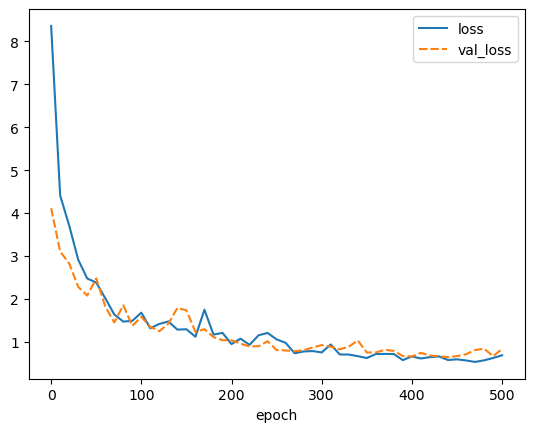

best weights loaded


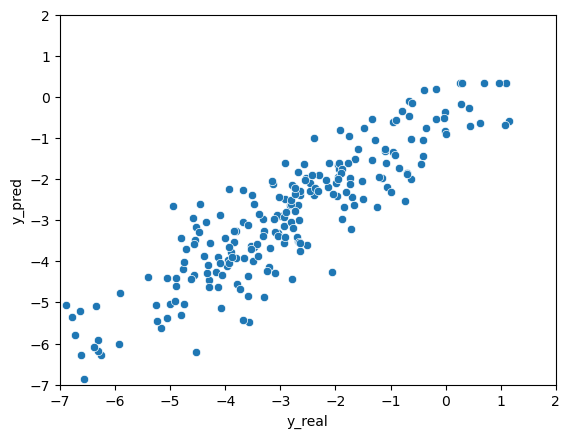

elapsed time: 129.4600100517273
run: 15
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB389F340>, <torch.utils.data.dataset.Subset object at 0x0000024DB36D8730>, <torch.utils.data.dataset.Subset object at 0x0000024DEC3BEAC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.839652856190999 | Validation Loss 3.9432652592658997
Epoch 10 | Train Loss 2.8175347805023194 | Validation Loss 2.5017872750759125
Epoch 20 | Train Loss 2.037680959701538 | Validation Loss 2.6548789739608765
Epoch 30 | Train Loss 1.8636986494064331 | Validation Loss 1.7231070697307587
Epoch 40 | Train Loss 1.4659324328104655 | Validation Loss 1.5369437336921692
Epoch 50 | Train Loss 1.2913294831911724 | Validation Loss 1.316014438867569
Epoch 60 | Train Loss 1.249116059144338 | Validation Loss 3.2581648230552673
Epoch 70 | Train Loss 1.104066014289856 | Validation Loss 1.7997946739196777
Epoch 80 | Train Loss 1.1911323070526123 | Validation Loss 1.1548899710178375
Epoch 90 | Train Loss 0.9050312240918478 | Validation Loss 1.1251163333654404
Epoch 100 | Train Loss 0.8734016656875611 | Validation Loss 1.4841567873954773
Epoch 110 | Train Loss 0.8092817584673564 | Validation Loss 1.2661014199256897
Epoch 120 | Train Loss 0.8377702434857687 | Validation Loss 1.361691

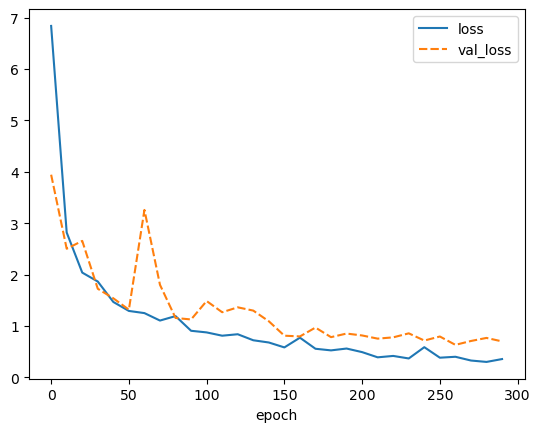

best weights loaded


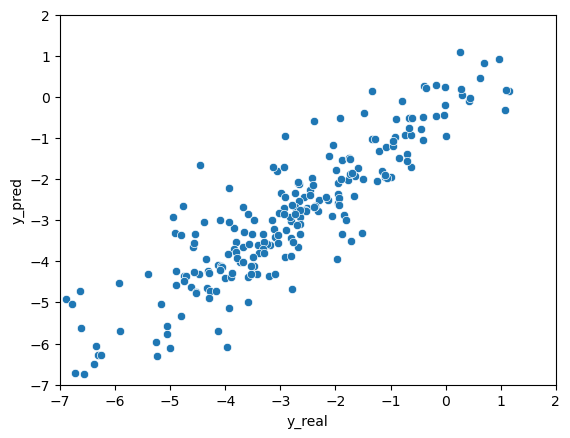

elapsed time: 73.812171459198
run: 16
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4B5D940>, <torch.utils.data.dataset.Subset object at 0x0000024DB4B50BE0>, <torch.utils.data.dataset.Subset object at 0x0000024DB4B50C70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.519089237848918 | Validation Loss 4.346011400222778
Epoch 10 | Train Loss 4.490731700261434 | Validation Loss 3.4118052423000336
Epoch 20 | Train Loss 4.490785614649455 | Validation Loss 3.7012734413146973
Epoch 30 | Train Loss 4.464626836776733 | Validation Loss 3.344520151615143
Epoch 40 | Train Loss 4.362364975611369 | Validation Loss 3.3720083832740784
Epoch 50 | Train Loss 3.7575174013773602 | Validation Loss 3.375191032886505
Epoch 60 | Train Loss 3.8559651056925457 | Validation Loss 3.3416897654533386
Epoch 70 | Train Loss 3.662904707590739 | Validation Loss 3.3842174410820007
Epoch 80 | Train Loss 4.29097687403361 | Validation Loss 2.9595314860343933
Epoch 90 | Train Loss 3.6890873273213702 | Validation Loss 2.827598989009857
Epoch 100 | Train Loss 3.577864901224772 | Validation Loss 3.568643093109131
Epoch 110 | Train Loss 3.349595546722412 | Validation Loss 3.427410364151001
Epoch 120 | Train Loss 3.5392547925313314 | Validation Loss 2.6450971364974976


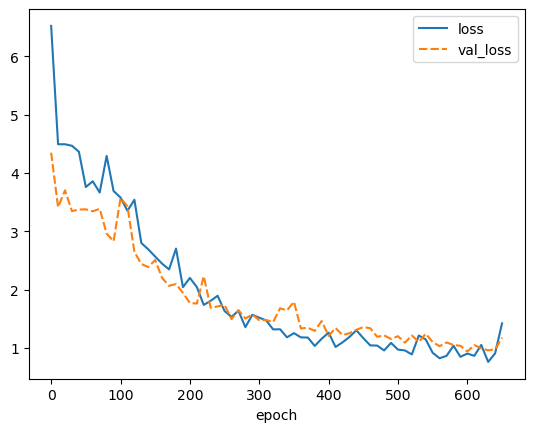

best weights loaded


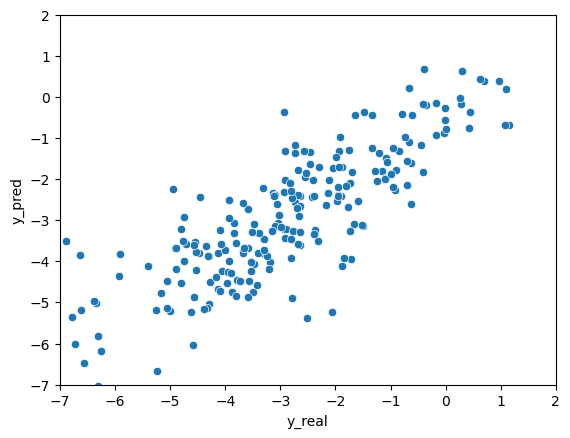

elapsed time: 177.52026391029358
run: 17
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4BCF370>, <torch.utils.data.dataset.Subset object at 0x0000024E57C94E20>, <torch.utils.data.dataset.Subset object at 0x0000024E57C947F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.289166609446208 | Validation Loss 3.863468289375305
Epoch 10 | Train Loss 4.113361851374308 | Validation Loss 3.8939907550811768
Epoch 20 | Train Loss 3.834950304031372 | Validation Loss 4.1831552386283875
Epoch 30 | Train Loss 4.302206818262736 | Validation Loss 3.1944718956947327
Epoch 40 | Train Loss 2.7036496877670286 | Validation Loss 2.4262272119522095
Epoch 50 | Train Loss 2.4791283925374348 | Validation Loss 2.15472275018692
Epoch 60 | Train Loss 2.152394247055054 | Validation Loss 2.231414169073105
Epoch 70 | Train Loss 1.9765294233957926 | Validation Loss 2.0056654810905457
Epoch 80 | Train Loss 1.8528818130493163 | Validation Loss 1.6007099747657776
Epoch 90 | Train Loss 1.7357940912246703 | Validation Loss 1.7181006073951721
Epoch 100 | Train Loss 1.5859270771344502 | Validation Loss 1.4697831571102142
Epoch 110 | Train Loss 1.552872689565023 | Validation Loss 1.6028547883033752
Epoch 120 | Train Loss 1.8130515257517497 | Validation Loss 1.62420684099

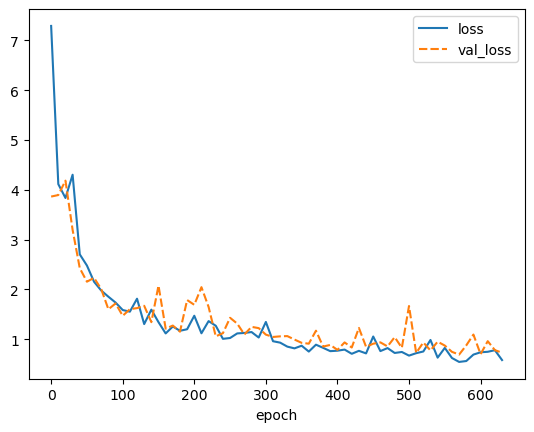

best weights loaded


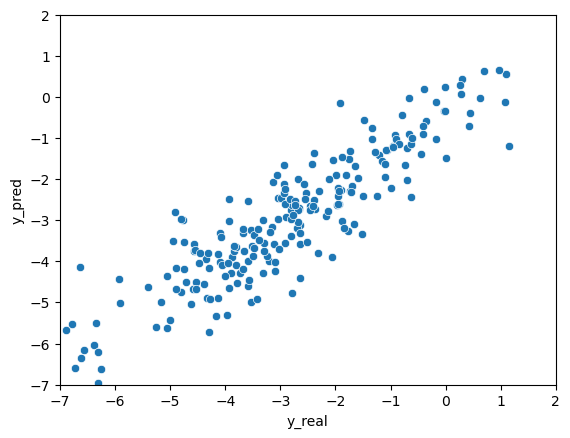

elapsed time: 174.07544422149658
run: 18
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB370C0D0>, <torch.utils.data.dataset.Subset object at 0x0000024DB384F6D0>, <torch.utils.data.dataset.Subset object at 0x0000024DB3901DF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.091207520167034 | Validation Loss 3.5782453417778015
Epoch 10 | Train Loss 3.9007042090098065 | Validation Loss 3.668885588645935
Epoch 20 | Train Loss 3.124907064437866 | Validation Loss 2.5013230443000793
Epoch 30 | Train Loss 2.495499110221863 | Validation Loss 2.8584247827529907
Epoch 40 | Train Loss 2.754719686508179 | Validation Loss 2.1543925404548645
Epoch 50 | Train Loss 1.9224341789881387 | Validation Loss 1.799372136592865
Epoch 60 | Train Loss 2.1231196959813436 | Validation Loss 1.6730326414108276
Epoch 70 | Train Loss 1.6721449534098307 | Validation Loss 1.6594783961772919
Epoch 80 | Train Loss 1.789978814125061 | Validation Loss 1.2614281177520752
Epoch 90 | Train Loss 1.5810928503672281 | Validation Loss 1.3625365495681763
Epoch 100 | Train Loss 1.466063674290975 | Validation Loss 1.4607796967029572
Epoch 110 | Train Loss 1.9587630907694498 | Validation Loss 1.7710403203964233
Epoch 120 | Train Loss 1.4483863631884257 | Validation Loss 1.841821610

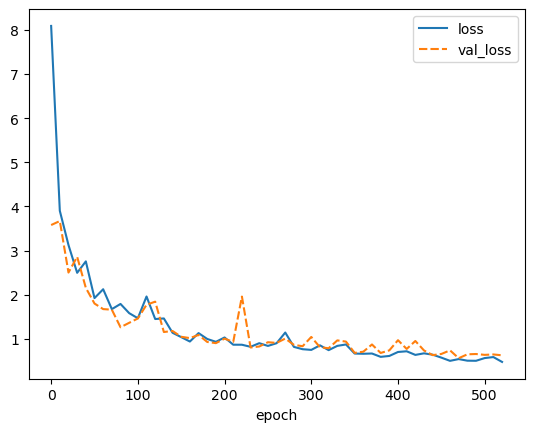

best weights loaded


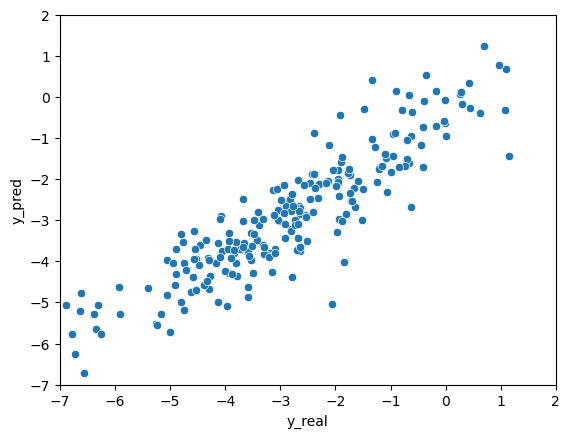

elapsed time: 134.77277827262878
run: 19
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57779640>, <torch.utils.data.dataset.Subset object at 0x0000024DB385C700>, <torch.utils.data.dataset.Subset object at 0x0000024DB385CF70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.426988951365153 | Validation Loss 4.370713114738464
Epoch 10 | Train Loss 3.7865642070770265 | Validation Loss 3.066906452178955
Epoch 20 | Train Loss 3.217705313364665 | Validation Loss 2.9516098499298096
Epoch 30 | Train Loss 2.32650838692983 | Validation Loss 2.768632173538208
Epoch 40 | Train Loss 1.925340461730957 | Validation Loss 1.6798130571842194
Epoch 50 | Train Loss 1.8863945960998536 | Validation Loss 1.6354603469371796
Epoch 60 | Train Loss 1.7257823864618937 | Validation Loss 1.4141837358474731
Epoch 70 | Train Loss 1.4597816983858745 | Validation Loss 1.2315708696842194
Epoch 80 | Train Loss 1.3282332956790923 | Validation Loss 1.8964019119739532
Epoch 90 | Train Loss 1.541414753595988 | Validation Loss 1.3355242908000946
Epoch 100 | Train Loss 1.1272542277971904 | Validation Loss 1.4065415263175964
Epoch 110 | Train Loss 1.1669496536254882 | Validation Loss 2.0256956815719604
Epoch 120 | Train Loss 1.2187247633934022 | Validation Loss 1.0996671020

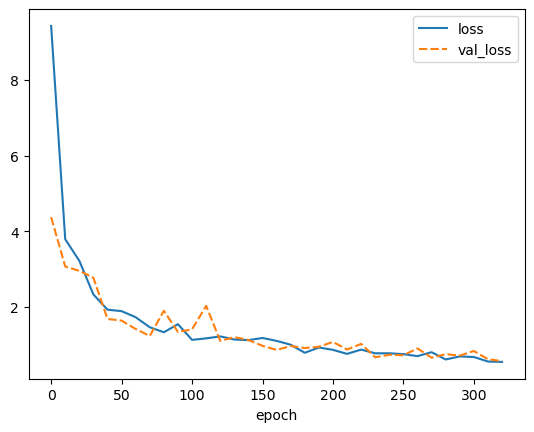

best weights loaded


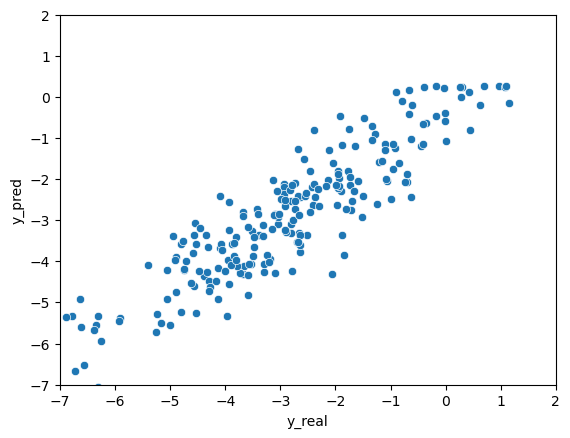

elapsed time: 85.59891247749329
run: 20
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3688C70>, <torch.utils.data.dataset.Subset object at 0x0000024DB37296A0>, <torch.utils.data.dataset.Subset object at 0x0000024DB37D5340>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.9667507330576575 | Validation Loss 3.735560953617096
Epoch 10 | Train Loss 4.223441664377848 | Validation Loss 4.201780319213867
Epoch 20 | Train Loss 2.9101926962534588 | Validation Loss 3.019903302192688
Epoch 30 | Train Loss 2.3757721980412803 | Validation Loss 4.604980289936066
Epoch 40 | Train Loss 1.5906490723292033 | Validation Loss 1.4604488611221313
Epoch 50 | Train Loss 1.79566224416097 | Validation Loss 4.797725677490234
Epoch 60 | Train Loss 1.277175239721934 | Validation Loss 1.174826666712761
Epoch 70 | Train Loss 1.519925324122111 | Validation Loss 1.6172670125961304
Epoch 80 | Train Loss 1.2746505697568258 | Validation Loss 2.1126576960086823
Epoch 90 | Train Loss 1.1703214645385742 | Validation Loss 1.1065998375415802
Epoch 100 | Train Loss 1.0167946060498556 | Validation Loss 1.6513386070728302
Epoch 110 | Train Loss 1.1205402692159017 | Validation Loss 1.1763542294502258
Epoch 120 | Train Loss 0.932844626903534 | Validation Loss 0.8816582411527

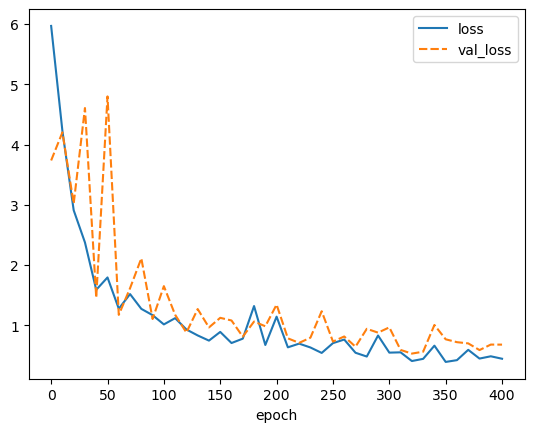

best weights loaded


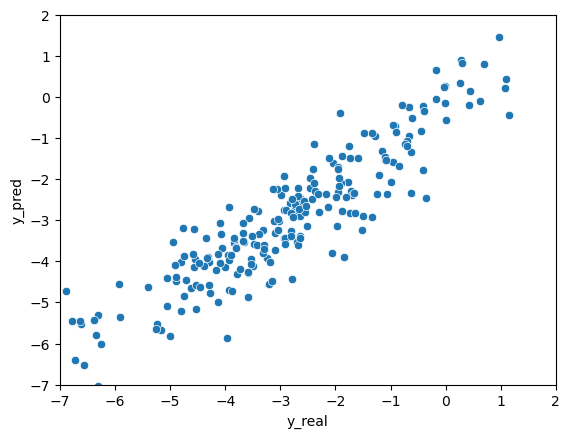

elapsed time: 101.50349235534668
run: 21
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4AA02B0>, <torch.utils.data.dataset.Subset object at 0x0000024DB363D070>, <torch.utils.data.dataset.Subset object at 0x0000024DB363D580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.115263271331788 | Validation Loss 3.8320887088775635
Epoch 10 | Train Loss 4.79893258412679 | Validation Loss 3.7324838638305664
Epoch 20 | Train Loss 4.591154209772745 | Validation Loss 3.918249726295471
Epoch 30 | Train Loss 4.253677384058634 | Validation Loss 3.659403443336487
Epoch 40 | Train Loss 4.007557773590088 | Validation Loss 3.3724103569984436
Epoch 50 | Train Loss 3.9955609957377116 | Validation Loss 3.403566539287567
Epoch 60 | Train Loss 4.114038944244385 | Validation Loss 3.2341575622558594
Epoch 70 | Train Loss 4.180489460627238 | Validation Loss 3.325510859489441
Epoch 80 | Train Loss 3.8298102537790935 | Validation Loss 3.1400612592697144
Epoch 90 | Train Loss 3.4867536862691244 | Validation Loss 3.4266542196273804
Epoch 100 | Train Loss 3.5230034510294597 | Validation Loss 3.3608242869377136
Epoch 110 | Train Loss 3.095292647679647 | Validation Loss 2.6434696316719055
Epoch 120 | Train Loss 3.037428363164266 | Validation Loss 2.595332026481628

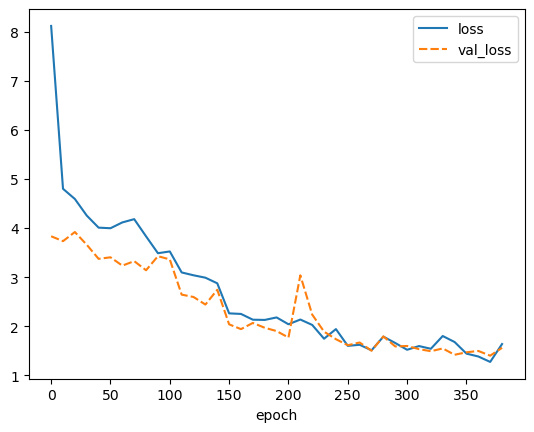

best weights loaded


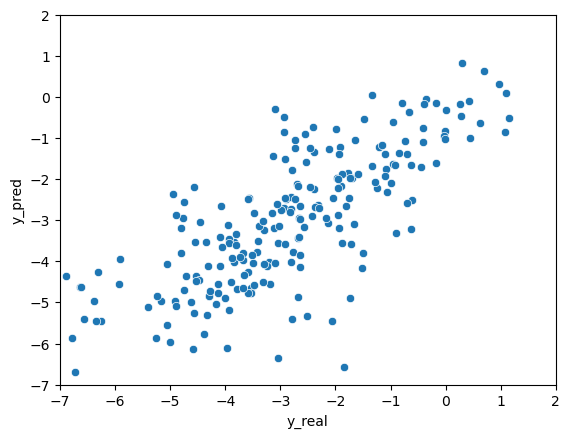

elapsed time: 107.94441556930542
run: 22
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3A56400>, <torch.utils.data.dataset.Subset object at 0x0000024E578A9C40>, <torch.utils.data.dataset.Subset object at 0x0000024E578A9550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.720412731170654 | Validation Loss 3.9096962213516235
Epoch 10 | Train Loss 4.047340647379557 | Validation Loss 3.50299996137619
Epoch 20 | Train Loss 3.983592176437378 | Validation Loss 3.331087648868561
Epoch 30 | Train Loss 3.8236563046773275 | Validation Loss 3.8549100160598755
Epoch 40 | Train Loss 3.183452320098877 | Validation Loss 2.8289756178855896
Epoch 50 | Train Loss 2.5852181673049928 | Validation Loss 2.4864637553691864
Epoch 60 | Train Loss 2.5951297601064045 | Validation Loss 2.3784696459770203
Epoch 70 | Train Loss 2.109280300140381 | Validation Loss 1.9454661905765533
Epoch 80 | Train Loss 2.185358730951945 | Validation Loss 2.019971340894699
Epoch 90 | Train Loss 1.744593612353007 | Validation Loss 1.7134383022785187
Epoch 100 | Train Loss 1.9613643010457358 | Validation Loss 2.523244261741638
Epoch 110 | Train Loss 1.8078723589579264 | Validation Loss 1.597988873720169
Epoch 120 | Train Loss 1.6316683292388916 | Validation Loss 2.08863270282745

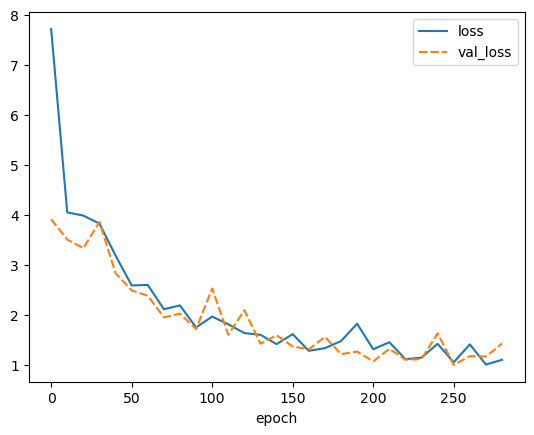

best weights loaded


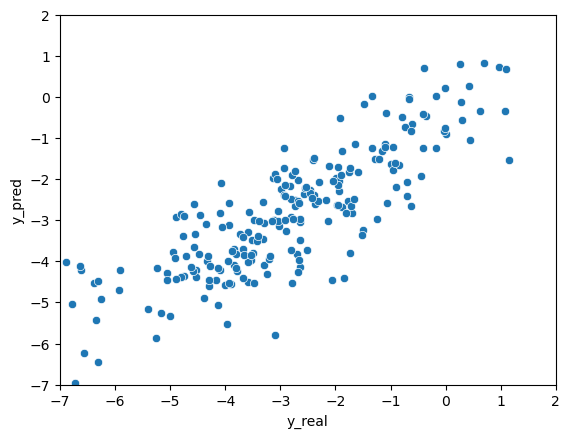

elapsed time: 78.21947312355042
run: 23
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB36DCDF0>, <torch.utils.data.dataset.Subset object at 0x0000024E579FB790>, <torch.utils.data.dataset.Subset object at 0x0000024E579FBCA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.131121603647868 | Validation Loss 3.874359905719757
Epoch 10 | Train Loss 3.9206828753153484 | Validation Loss 3.4586384296417236
Epoch 20 | Train Loss 3.408804941177368 | Validation Loss 3.1075609922409058
Epoch 30 | Train Loss 3.3458323240280152 | Validation Loss 2.9734474420547485
Epoch 40 | Train Loss 2.653461742401123 | Validation Loss 2.2487994730472565
Epoch 50 | Train Loss 2.255089004834493 | Validation Loss 2.0902772545814514
Epoch 60 | Train Loss 1.9383627971013386 | Validation Loss 2.035050243139267
Epoch 70 | Train Loss 2.148578898111979 | Validation Loss 2.102609932422638
Epoch 80 | Train Loss 1.9739704688390096 | Validation Loss 1.5993000268936157
Epoch 90 | Train Loss 1.5339606205622356 | Validation Loss 1.3780219852924347
Epoch 100 | Train Loss 1.6058445930480958 | Validation Loss 2.2287534177303314
Epoch 110 | Train Loss 1.3158241391181946 | Validation Loss 1.171497792005539
Epoch 120 | Train Loss 1.3039530316988628 | Validation Loss 1.3971443474

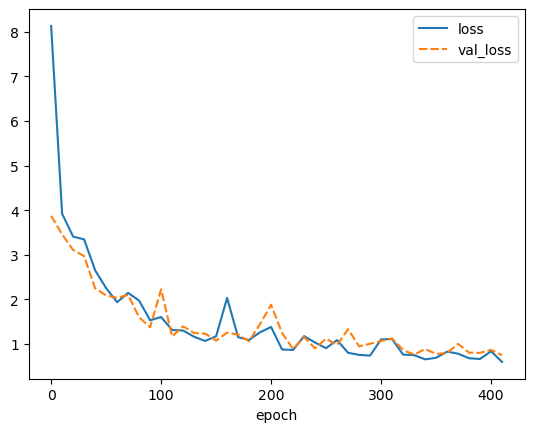

best weights loaded


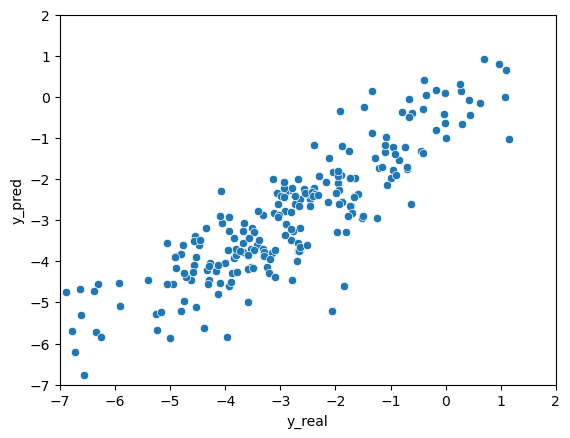

elapsed time: 108.8924708366394
run: 24
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


[<torch.utils.data.dataset.Subset object at 0x0000024DB3794550>, <torch.utils.data.dataset.Subset object at 0x0000024DB4B50580>, <torch.utils.data.dataset.Subset object at 0x0000024DB4B50C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 14.747070058186848 | Validation Loss 12.223891735076904
Epoch 10 | Train Loss 4.886320384343465 | Validation Loss 3.8389252424240112
Epoch 20 | Train Loss 3.9485485672950746 | Validation Loss 3.664032518863678
Epoch 30 | Train Loss 3.933090829849243 | Validation Loss 3.219728708267212
Epoch 40 | Train Loss 4.2586607217788695 | Validation Loss 2.895440697669983
Epoch 50 | Train Loss 2.9753154277801515 | Validation Loss 3.212528347969055
Epoch 60 | Train Loss 2.809368308385213 | Validation Loss 2.

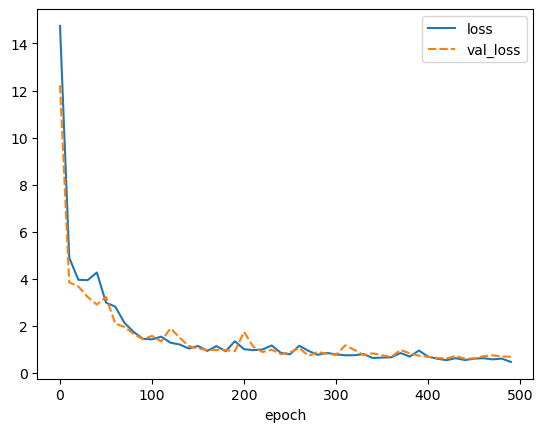

best weights loaded


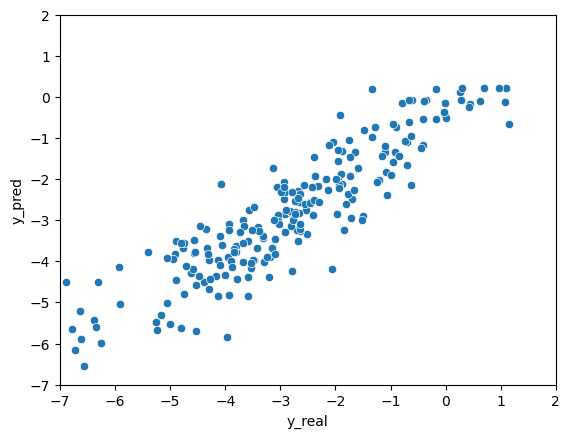

elapsed time: 130.369056224823
run: 25
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC31B5E0>, <torch.utils.data.dataset.Subset object at 0x0000024DEC283160>, <torch.utils.data.dataset.Subset object at 0x0000024DEC283670>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.922552156448364 | Validation Loss 3.8008492588996887
Epoch 10 | Train Loss 3.003885793685913 | Validation Loss 2.823754131793976
Epoch 20 | Train Loss 3.270017464955648 | Validation Loss 2.3759970664978027
Epoch 30 | Train Loss 2.0519444227218626 | Validation Loss 1.6541675627231598
Epoch 40 | Train Loss 2.1598289251327514 | Validation Loss 1.514364778995514
Epoch 50 | Train Loss 1.544885762532552 | Validation Loss 1.6077323257923126
Epoch 60 | Train Loss 1.3518658479054768 | Validation Loss 1.5296074748039246
Epoch 70 | Train Loss 1.0501060207684836 | Validation Loss 1.127995491027832
Epoch 80 | Train Loss 1.01107972462972 | Validation Loss 1.0445350408554077
Epoch 90 | Train Loss 1.0538430094718934 | Validation Loss 1.0547994375228882
Epoch 100 | Train Loss 0.9981630047162374 | Validation Loss 1.1512024700641632
Epoch 110 | Train Loss 0.8962685585021972 | Validation Loss 1.00167977809906
Epoch 120 | Train Loss 0.94357297817866 | Validation Loss 1.00044603645801

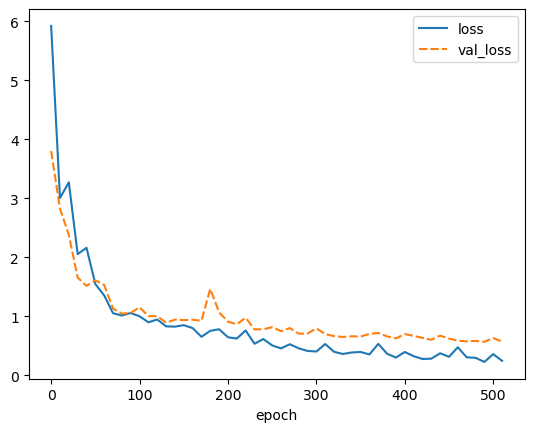

best weights loaded


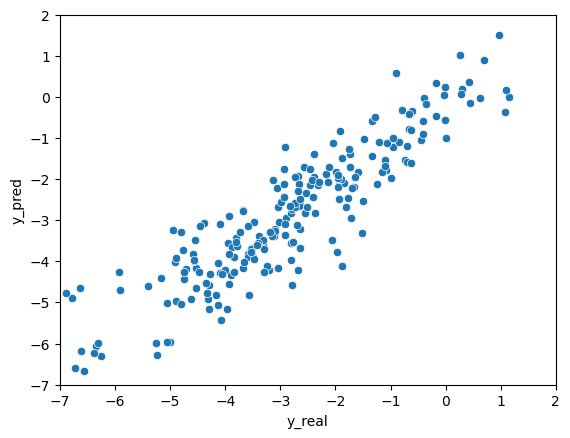

elapsed time: 131.0522961616516
run: 26
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC309A00>, <torch.utils.data.dataset.Subset object at 0x0000024DB3907C10>, <torch.utils.data.dataset.Subset object at 0x0000024DB37B3E50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.896820537249247 | Validation Loss 4.341388285160065
Epoch 10 | Train Loss 4.552959791819254 | Validation Loss 3.762098014354706
Epoch 20 | Train Loss 4.329759009679159 | Validation Loss 3.4166112542152405
Epoch 30 | Train Loss 3.919411355257034 | Validation Loss 3.5934609174728394
Epoch 40 | Train Loss 4.387906694412232 | Validation Loss 3.2707203030586243
Epoch 50 | Train Loss 3.7509936491648355 | Validation Loss 3.147684097290039
Epoch 60 | Train Loss 4.323117256164551 | Validation Loss 3.1919012665748596
Epoch 70 | Train Loss 3.8530035495758055 | Validation Loss 3.064700484275818
Epoch 80 | Train Loss 3.577566321690877 | Validation Loss 3.0617143511772156
Epoch 90 | Train Loss 3.6536268750826517 | Validation Loss 3.0736624002456665
Epoch 100 | Train Loss 3.4181097507476808 | Validation Loss 3.1295535564422607
Epoch 110 | Train Loss 3.5244601408640546 | Validation Loss 3.076678693294525
Epoch 120 | Train Loss 3.36973663965861 | Validation Loss 2.791565597057342

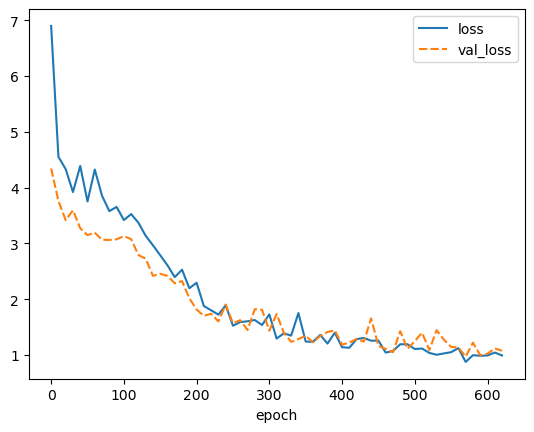

best weights loaded


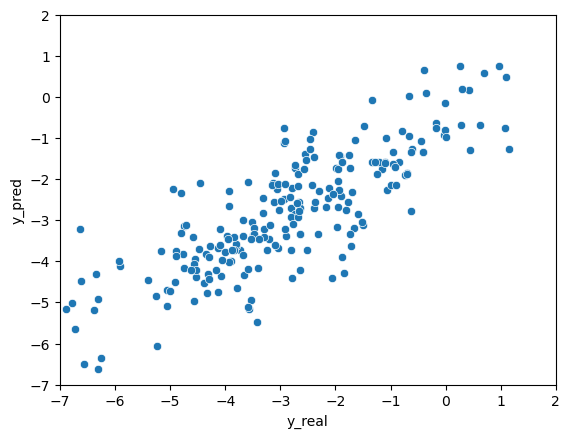

elapsed time: 167.38907289505005
run: 27
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3A56580>, <torch.utils.data.dataset.Subset object at 0x0000024DEC392190>, <torch.utils.data.dataset.Subset object at 0x0000024DEC3926A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.882598606745402 | Validation Loss 4.288244843482971
Epoch 10 | Train Loss 4.2994895299275715 | Validation Loss 3.1450427770614624
Epoch 20 | Train Loss 3.395162312189738 | Validation Loss 2.9879403710365295
Epoch 30 | Train Loss 3.722117805480957 | Validation Loss 3.193352162837982
Epoch 40 | Train Loss 3.1406419118245443 | Validation Loss 2.636700928211212
Epoch 50 | Train Loss 2.6598663568496703 | Validation Loss 2.6480332612991333
Epoch 60 | Train Loss 2.3902227163314818 | Validation Loss 2.374566465616226
Epoch 70 | Train Loss 2.5299076875050863 | Validation Loss 2.266309380531311
Epoch 80 | Train Loss 2.166638700167338 | Validation Loss 1.9599183797836304
Epoch 90 | Train Loss 2.237999137242635 | Validation Loss 1.9450287222862244
Epoch 100 | Train Loss 1.9636593580245971 | Validation Loss 1.8893005549907684
Epoch 110 | Train Loss 1.6887388467788695 | Validation Loss 1.7671833336353302
Epoch 120 | Train Loss 2.198928380012512 | Validation Loss 2.200115740299

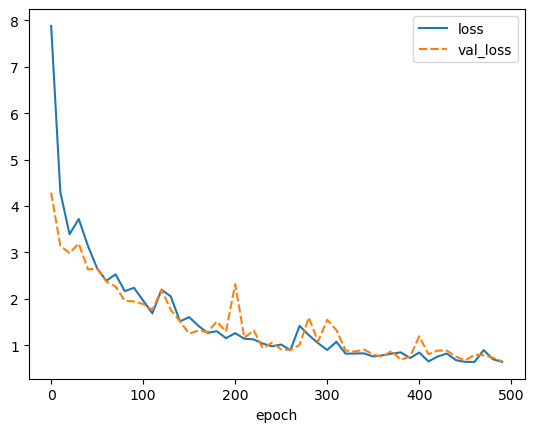

best weights loaded


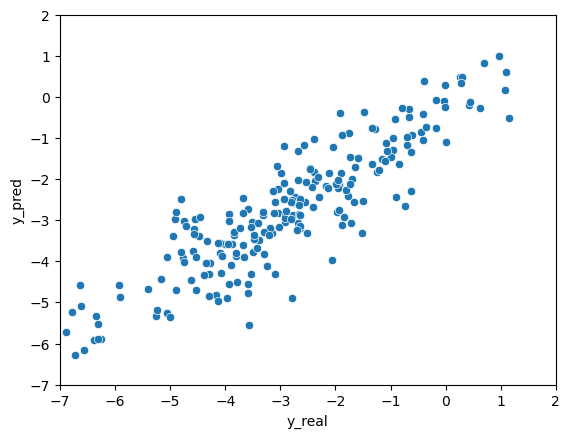

elapsed time: 135.03725600242615
run: 28
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4B169A0>, <torch.utils.data.dataset.Subset object at 0x0000024DB39AA100>, <torch.utils.data.dataset.Subset object at 0x0000024DB39AA1F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.994272708892822 | Validation Loss 4.439035773277283
Epoch 10 | Train Loss 3.7140307903289793 | Validation Loss 3.145942449569702
Epoch 20 | Train Loss 3.3870362679163617 | Validation Loss 2.891155779361725
Epoch 30 | Train Loss 2.7258511543273927 | Validation Loss 2.253784954547882
Epoch 40 | Train Loss 2.288349429766337 | Validation Loss 2.2058275938034058
Epoch 50 | Train Loss 1.9816905419031778 | Validation Loss 1.9712786674499512
Epoch 60 | Train Loss 2.3024322430292767 | Validation Loss 2.5946701169013977
Epoch 70 | Train Loss 2.2048967599868776 | Validation Loss 1.7743951082229614
Epoch 80 | Train Loss 2.053179160753886 | Validation Loss 1.7341213524341583
Epoch 90 | Train Loss 1.8699606736501058 | Validation Loss 1.4511704444885254
Epoch 100 | Train Loss 1.5838745355606079 | Validation Loss 1.2695777416229248
Epoch 110 | Train Loss 1.7018362760543824 | Validation Loss 1.3757247030735016
Epoch 120 | Train Loss 1.275045104821523 | Validation Loss 1.186793774

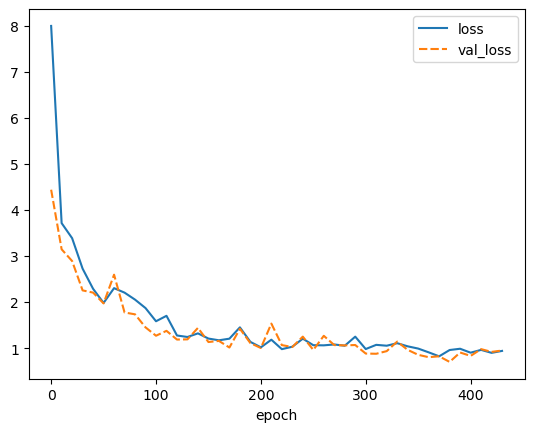

best weights loaded


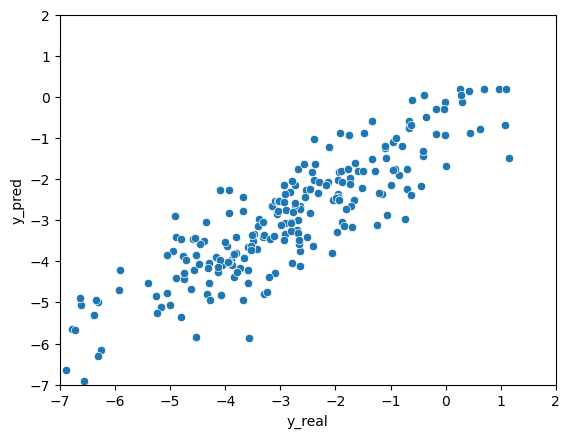

elapsed time: 116.92261481285095
run: 29
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57AC6400>, <torch.utils.data.dataset.Subset object at 0x0000024E57AF6D00>, <torch.utils.data.dataset.Subset object at 0x0000024E57AFD250>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.004115390777589 | Validation Loss 4.785243988037109
Epoch 10 | Train Loss 3.880414613087972 | Validation Loss 3.5582094192504883
Epoch 20 | Train Loss 3.562631845474243 | Validation Loss 2.9583290219306946
Epoch 30 | Train Loss 3.180170710881551 | Validation Loss 4.017786204814911
Epoch 40 | Train Loss 2.3995526393254596 | Validation Loss 3.0344964265823364
Epoch 50 | Train Loss 1.8897644102573394 | Validation Loss 1.7319700419902802
Epoch 60 | Train Loss 2.102341079711914 | Validation Loss 1.8624974489212036
Epoch 70 | Train Loss 1.7498483022054037 | Validation Loss 2.2744672000408173
Epoch 80 | Train Loss 1.5143315553665162 | Validation Loss 1.9919520616531372
Epoch 90 | Train Loss 1.5396998882293702 | Validation Loss 1.2851764559745789
Epoch 100 | Train Loss 1.465101424853007 | Validation Loss 1.400109887123108
Epoch 110 | Train Loss 1.4219142317771911 | Validation Loss 1.435830533504486
Epoch 120 | Train Loss 1.3318954229354858 | Validation Loss 1.2318800389

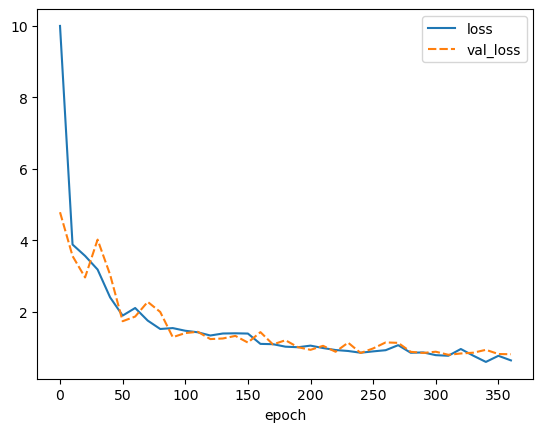

best weights loaded


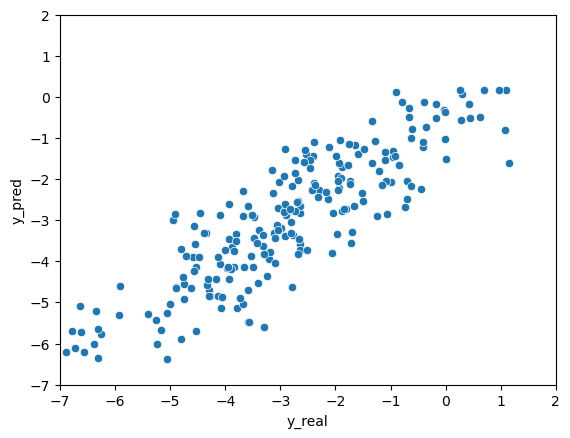

elapsed time: 95.70047402381897
run: 30
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB392CD60>, <torch.utils.data.dataset.Subset object at 0x0000024E57C6BEE0>, <torch.utils.data.dataset.Subset object at 0x0000024E57C6BBB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.856026840209961 | Validation Loss 5.112660109996796
Epoch 10 | Train Loss 3.073283863067627 | Validation Loss 2.8572396636009216
Epoch 20 | Train Loss 2.101865021387736 | Validation Loss 1.8648000657558441
Epoch 30 | Train Loss 1.4550585230191548 | Validation Loss 2.071571707725525
Epoch 40 | Train Loss 1.2757368365923563 | Validation Loss 2.0255252718925476
Epoch 50 | Train Loss 1.0924527684847514 | Validation Loss 1.2192130982875824
Epoch 60 | Train Loss 1.1495080510775249 | Validation Loss 1.5576491951942444
Epoch 70 | Train Loss 0.9122128864129384 | Validation Loss 1.4325000941753387
Epoch 80 | Train Loss 0.8506768822669983 | Validation Loss 1.104369342327118
Epoch 90 | Train Loss 0.7143430511156718 | Validation Loss 0.8610420078039169
Epoch 100 | Train Loss 0.713564952214559 | Validation Loss 1.0862556248903275
Epoch 110 | Train Loss 0.6223092635472616 | Validation Loss 0.8673886656761169
Epoch 120 | Train Loss 0.5897180428107579 | Validation Loss 0.90894170

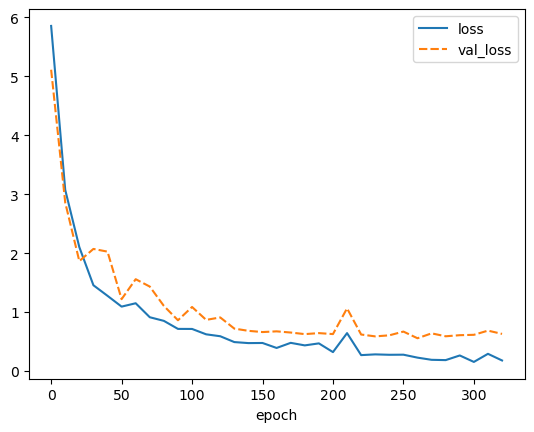

best weights loaded


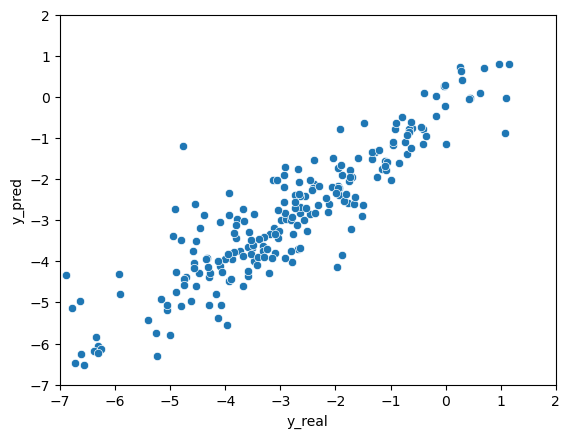

elapsed time: 92.5282256603241
run: 31
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB359A6A0>, <torch.utils.data.dataset.Subset object at 0x0000024E57798130>, <torch.utils.data.dataset.Subset object at 0x0000024E577983A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.439685885111491 | Validation Loss 4.33953458070755
Epoch 10 | Train Loss 5.003284009297689 | Validation Loss 3.6415818333625793
Epoch 20 | Train Loss 4.164972956975301 | Validation Loss 3.334936022758484
Epoch 30 | Train Loss 4.158616447448731 | Validation Loss 3.702768087387085
Epoch 40 | Train Loss 4.334558725357056 | Validation Loss 3.3614537715911865
Epoch 50 | Train Loss 4.005379184087118 | Validation Loss 3.629325747489929
Epoch 60 | Train Loss 3.954836066563924 | Validation Loss 3.162947952747345
Epoch 70 | Train Loss 3.8028878529866534 | Validation Loss 3.4821715354919434
Epoch 80 | Train Loss 4.137429269154866 | Validation Loss 3.406931757926941
Epoch 90 | Train Loss 3.4461069186528523 | Validation Loss 3.0845568776130676
Epoch 100 | Train Loss 3.2605820735295614 | Validation Loss 2.8403507471084595
Epoch 110 | Train Loss 3.216409269968669 | Validation Loss 2.938481867313385
Epoch 120 | Train Loss 3.1554571628570556 | Validation Loss 2.903027296066284
Ep

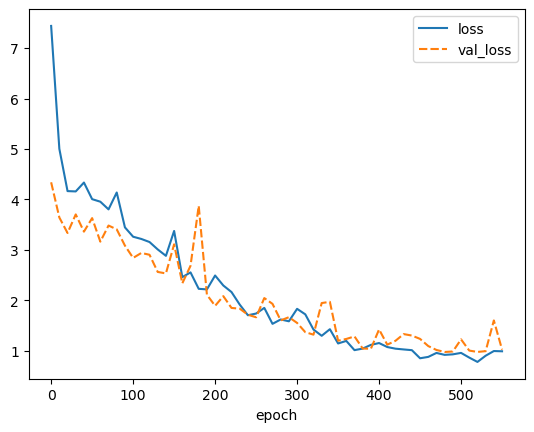

best weights loaded


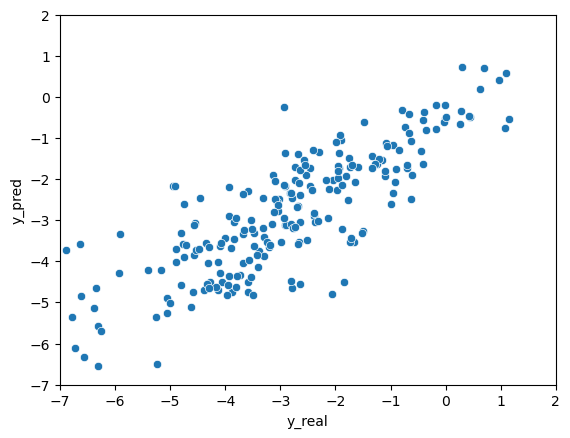

elapsed time: 177.10620641708374
run: 32
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3896B50>, <torch.utils.data.dataset.Subset object at 0x0000024E57CAD610>, <torch.utils.data.dataset.Subset object at 0x0000024E57CADB20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.351530869801839 | Validation Loss 3.7082443833351135
Epoch 10 | Train Loss 4.048903052012125 | Validation Loss 3.6027705669403076
Epoch 20 | Train Loss 4.582292318344116 | Validation Loss 3.338076174259186
Epoch 30 | Train Loss 3.182734791437785 | Validation Loss 2.8961729407310486
Epoch 40 | Train Loss 2.9523328304290772 | Validation Loss 2.4140684604644775
Epoch 50 | Train Loss 2.582263477643331 | Validation Loss 2.648041069507599
Epoch 60 | Train Loss 2.187615990638733 | Validation Loss 2.523969888687134
Epoch 70 | Train Loss 2.0006503820419312 | Validation Loss 1.9592442214488983
Epoch 80 | Train Loss 2.3582003752390546 | Validation Loss 2.6467899084091187
Epoch 90 | Train Loss 2.008073878288269 | Validation Loss 1.4294100105762482
Epoch 100 | Train Loss 1.7834788759549458 | Validation Loss 1.561917632818222
Epoch 110 | Train Loss 1.7589027444521586 | Validation Loss 1.3244962692260742
Epoch 120 | Train Loss 1.4779133717219035 | Validation Loss 1.867351770401

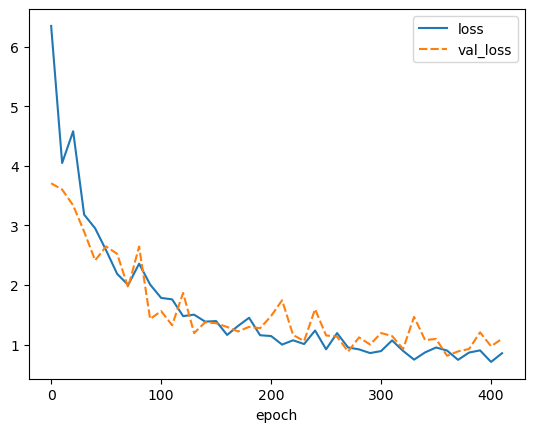

best weights loaded


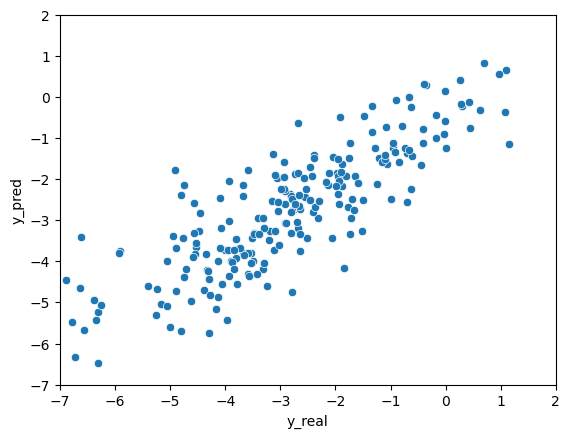

elapsed time: 128.64712119102478
run: 33
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC27FCA0>, <torch.utils.data.dataset.Subset object at 0x0000024DEC3494C0>, <torch.utils.data.dataset.Subset object at 0x0000024DEC349130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.12576322555542 | Validation Loss 5.996454834938049
Epoch 10 | Train Loss 3.847163526217143 | Validation Loss 3.1663687229156494
Epoch 20 | Train Loss 3.7332860310872396 | Validation Loss 5.174818515777588
Epoch 30 | Train Loss 2.6466368436813354 | Validation Loss 2.984536826610565
Epoch 40 | Train Loss 2.1862144947052 | Validation Loss 1.9060091376304626
Epoch 50 | Train Loss 2.0730005661646524 | Validation Loss 1.963345468044281
Epoch 60 | Train Loss 1.8157482385635375 | Validation Loss 2.189765512943268
Epoch 70 | Train Loss 2.1165618658065797 | Validation Loss 1.8500273823738098
Epoch 80 | Train Loss 1.8651875098546347 | Validation Loss 2.4483267962932587
Epoch 90 | Train Loss 1.6203691720962525 | Validation Loss 1.550899177789688
Epoch 100 | Train Loss 1.5143813530604044 | Validation Loss 1.6030955016613007
Epoch 110 | Train Loss 1.43680100440979 | Validation Loss 1.408464938402176
Epoch 120 | Train Loss 1.319657270113627 | Validation Loss 1.5148216485977173


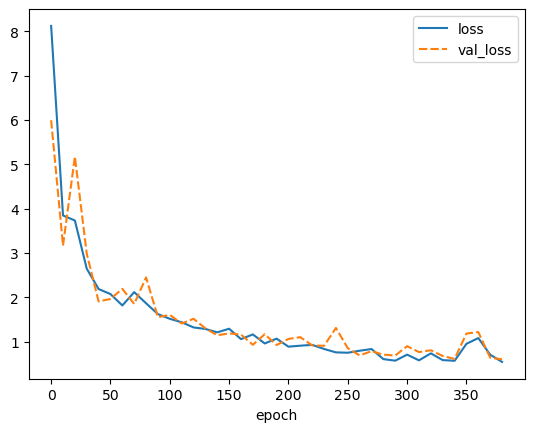

best weights loaded


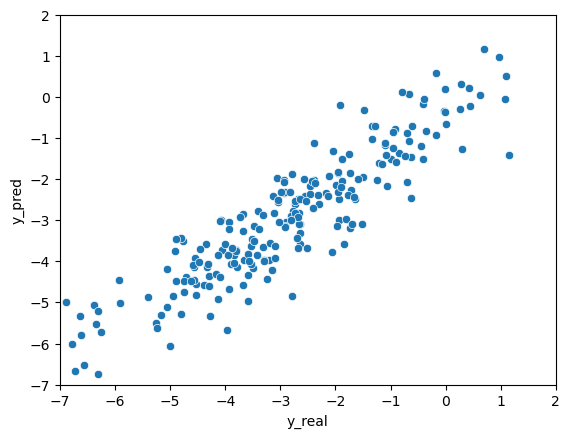

elapsed time: 123.51603770256042
run: 34
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4A7D040>, <torch.utils.data.dataset.Subset object at 0x0000024DEC2F5970>, <torch.utils.data.dataset.Subset object at 0x0000024DEC2F5E80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.7041228612264 | Validation Loss 4.1049588322639465
Epoch 10 | Train Loss 3.8581614017486574 | Validation Loss 3.1954466700553894
Epoch 20 | Train Loss 3.9407532533009846 | Validation Loss 3.7224668860435486
Epoch 30 | Train Loss 2.759652598698934 | Validation Loss 3.218309164047241
Epoch 40 | Train Loss 2.9964601039886474 | Validation Loss 1.8543426990509033
Epoch 50 | Train Loss 1.6311274290084838 | Validation Loss 2.1003615260124207
Epoch 60 | Train Loss 1.6927318493525187 | Validation Loss 1.3873414397239685
Epoch 70 | Train Loss 1.5963699380556742 | Validation Loss 1.7260774672031403
Epoch 80 | Train Loss 1.3635862628618876 | Validation Loss 1.4939236640930176
Epoch 90 | Train Loss 1.2535053968429566 | Validation Loss 1.3082039654254913
Epoch 100 | Train Loss 1.2410496552785237 | Validation Loss 1.1147628724575043
Epoch 110 | Train Loss 1.044564958413442 | Validation Loss 1.243402510881424
Epoch 120 | Train Loss 1.6047390302022297 | Validation Loss 1.40195351

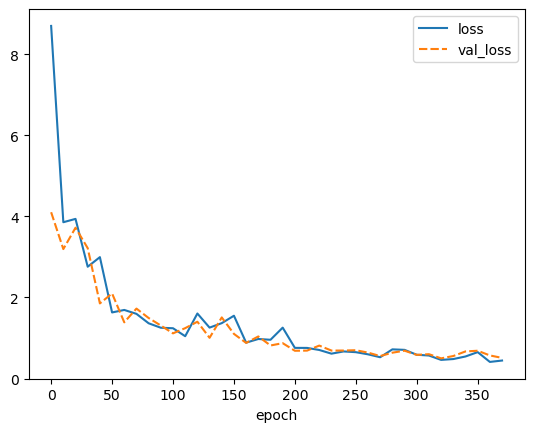

best weights loaded


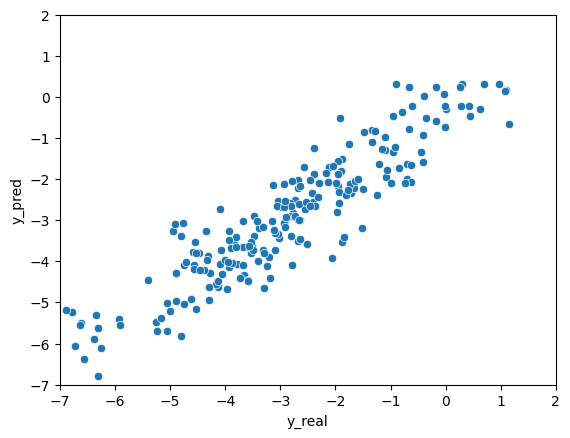

elapsed time: 116.171701669693
run: 35
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3A39B80>, <torch.utils.data.dataset.Subset object at 0x0000024E577918B0>, <torch.utils.data.dataset.Subset object at 0x0000024DB38DEE20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.781851398944855 | Validation Loss 4.104054033756256
Epoch 10 | Train Loss 3.6871447722117106 | Validation Loss 3.2763670086860657
Epoch 20 | Train Loss 2.8982967535654702 | Validation Loss 2.8310869336128235
Epoch 30 | Train Loss 2.065405742327372 | Validation Loss 2.1400134563446045
Epoch 40 | Train Loss 1.5848835786183675 | Validation Loss 1.7134137153625488
Epoch 50 | Train Loss 1.5491009155909221 | Validation Loss 1.4023630321025848
Epoch 60 | Train Loss 1.3858068386713664 | Validation Loss 1.4513933658599854
Epoch 70 | Train Loss 1.4897680759429932 | Validation Loss 1.137753278017044
Epoch 80 | Train Loss 1.2525236447652182 | Validation Loss 1.0671152472496033
Epoch 90 | Train Loss 1.2325888832410177 | Validation Loss 1.0193002820014954
Epoch 100 | Train Loss 1.2360029578208924 | Validation Loss 1.0979723781347275
Epoch 110 | Train Loss 0.9761914571126302 | Validation Loss 0.8936477601528168
Epoch 120 | Train Loss 0.9609508315722147 | Validation Loss 0.96937

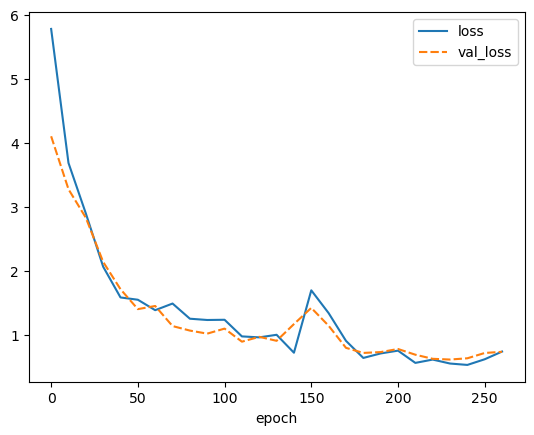

best weights loaded


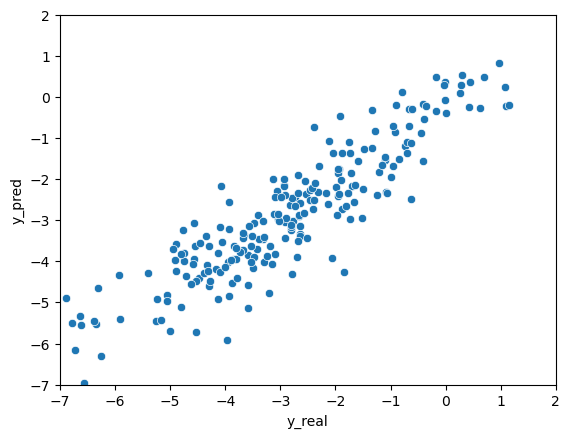

elapsed time: 73.556969165802
run: 36
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57874DF0>, <torch.utils.data.dataset.Subset object at 0x0000024E57C85D00>, <torch.utils.data.dataset.Subset object at 0x0000024E57CA1250>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.340972805023194 | Validation Loss 3.9581964015960693
Epoch 10 | Train Loss 4.5520702203114825 | Validation Loss 3.8385064005851746
Epoch 20 | Train Loss 4.19015105565389 | Validation Loss 3.5754706859588623
Epoch 30 | Train Loss 3.9605889002482098 | Validation Loss 3.3679412603378296
Epoch 40 | Train Loss 3.909476629892985 | Validation Loss 3.316666305065155
Epoch 50 | Train Loss 3.9562607924143474 | Validation Loss 3.58989679813385
Epoch 60 | Train Loss 4.137172635396322 | Validation Loss 3.4253008365631104
Epoch 70 | Train Loss 4.117783371607462 | Validation Loss 3.2177576422691345
Epoch 80 | Train Loss 3.7702942848205567 | Validation Loss 3.3307225704193115
Epoch 90 | Train Loss 3.8967532316843667 | Validation Loss 3.0798710584640503
Epoch 100 | Train Loss 3.823359227180481 | Validation Loss 3.0125385522842407
Epoch 110 | Train Loss 3.4403178056081134 | Validation Loss 2.978677749633789
Epoch 120 | Train Loss 3.068493946393331 | Validation Loss 2.5554173588752

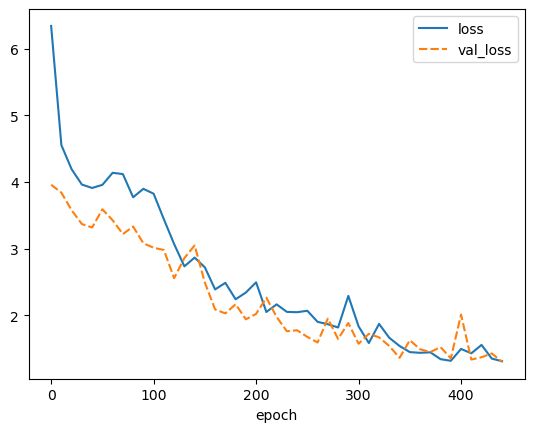

best weights loaded


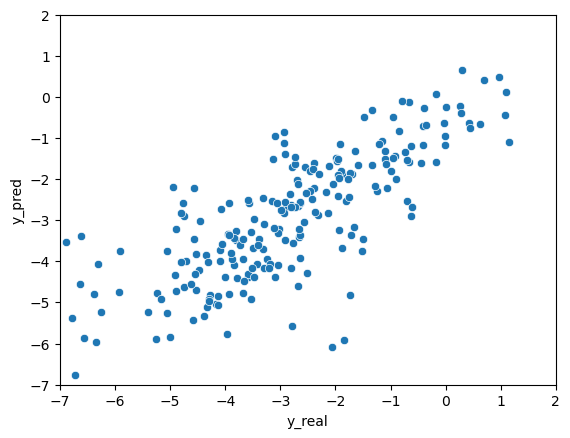

elapsed time: 136.23960328102112
run: 37
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC34F9A0>, <torch.utils.data.dataset.Subset object at 0x0000024DB35F61C0>, <torch.utils.data.dataset.Subset object at 0x0000024DB38A70A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.563392957051595 | Validation Loss 5.569157242774963
Epoch 10 | Train Loss 4.150662104288737 | Validation Loss 3.484073042869568
Epoch 20 | Train Loss 4.6361727555592855 | Validation Loss 4.128914952278137
Epoch 30 | Train Loss 3.4273601214090985 | Validation Loss 3.02778959274292
Epoch 40 | Train Loss 3.0676065762837728 | Validation Loss 2.8207287192344666
Epoch 50 | Train Loss 2.8606594880421956 | Validation Loss 2.4635430574417114
Epoch 60 | Train Loss 2.5989400307337442 | Validation Loss 1.8876508176326752
Epoch 70 | Train Loss 2.6367701053619386 | Validation Loss 1.9410372078418732
Epoch 80 | Train Loss 2.064690844217936 | Validation Loss 1.6817083060741425
Epoch 90 | Train Loss 1.9144153038660685 | Validation Loss 1.6687714457511902
Epoch 100 | Train Loss 1.850769543647766 | Validation Loss 1.4380689859390259
Epoch 110 | Train Loss 1.6464616298675536 | Validation Loss 1.444821059703827
Epoch 120 | Train Loss 1.8376580317815145 | Validation Loss 1.52098038792

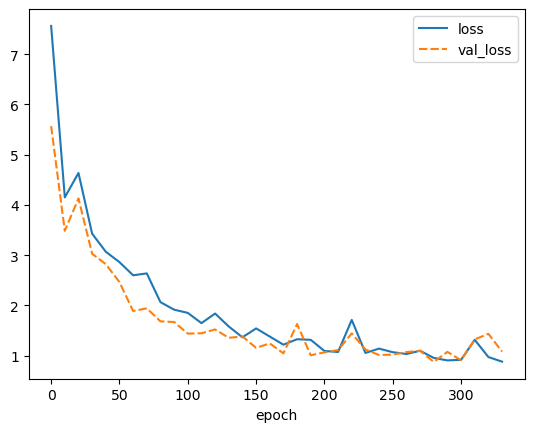

best weights loaded


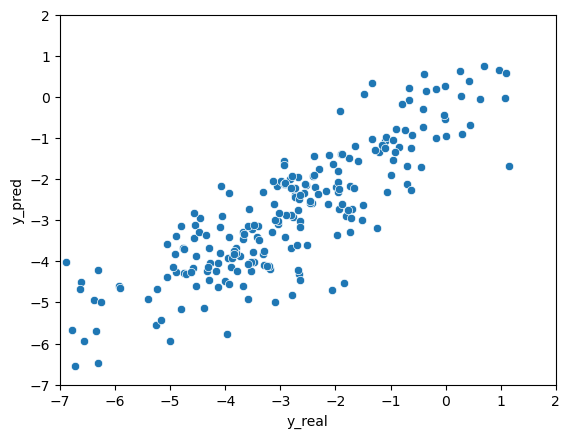

elapsed time: 103.31706285476685
run: 38
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3A07700>, <torch.utils.data.dataset.Subset object at 0x0000024DE9F08760>, <torch.utils.data.dataset.Subset object at 0x0000024DE9F08C70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.490717975298564 | Validation Loss 4.485609769821167
Epoch 10 | Train Loss 4.116463279724121 | Validation Loss 3.4250619411468506
Epoch 20 | Train Loss 3.473321040471395 | Validation Loss 2.5834410190582275
Epoch 30 | Train Loss 2.840871016184489 | Validation Loss 3.43884813785553
Epoch 40 | Train Loss 2.022835600376129 | Validation Loss 2.177935004234314
Epoch 50 | Train Loss 2.0195391019185385 | Validation Loss 2.7335251569747925
Epoch 60 | Train Loss 1.7913737853368124 | Validation Loss 2.027709573507309
Epoch 70 | Train Loss 1.5448603272438048 | Validation Loss 1.3603618741035461
Epoch 80 | Train Loss 1.5478179136912027 | Validation Loss 1.7277052700519562
Epoch 90 | Train Loss 1.569822327295939 | Validation Loss 1.2791207432746887
Epoch 100 | Train Loss 1.2010785082976023 | Validation Loss 1.0119348019361496
Epoch 110 | Train Loss 1.3671759118636448 | Validation Loss 1.1645423918962479
Epoch 120 | Train Loss 1.1136747221151988 | Validation Loss 1.290755361318

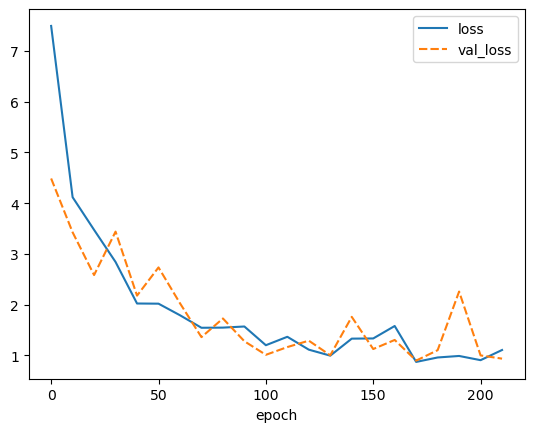

best weights loaded


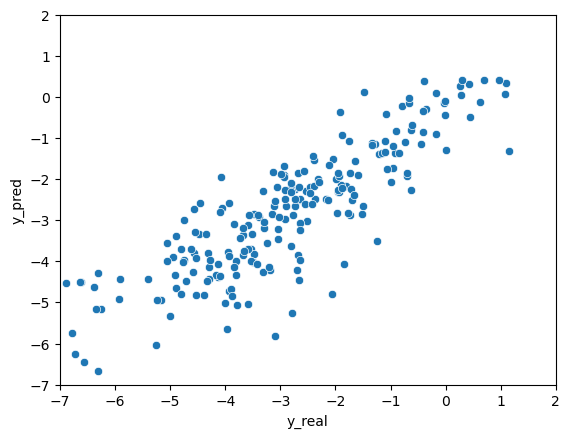

elapsed time: 67.5333685874939
run: 39
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC3A0700>, <torch.utils.data.dataset.Subset object at 0x0000024DB35D1970>, <torch.utils.data.dataset.Subset object at 0x0000024DB4AA6160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 9.937047290802003 | Validation Loss 4.077670395374298
Epoch 10 | Train Loss 5.137836329142252 | Validation Loss 4.382124543190002
Epoch 20 | Train Loss 3.7535907586415607 | Validation Loss 2.919509083032608
Epoch 30 | Train Loss 3.346673011779785 | Validation Loss 3.5041736364364624
Epoch 40 | Train Loss 2.557930755615234 | Validation Loss 2.5245850682258606
Epoch 50 | Train Loss 2.3080058415730793 | Validation Loss 2.8528116941452026
Epoch 60 | Train Loss 2.313554612795512 | Validation Loss 2.4629703164100647
Epoch 70 | Train Loss 1.6503178278605144 | Validation Loss 1.6734082996845245
Epoch 80 | Train Loss 1.7166749080022177 | Validation Loss 1.6288861632347107
Epoch 90 | Train Loss 1.314550938208898 | Validation Loss 1.1781564354896545
Epoch 100 | Train Loss 1.3985210339228311 | Validation Loss 1.4423560500144958
Epoch 110 | Train Loss 1.3397600650787354 | Validation Loss 1.1232947409152985
Epoch 120 | Train Loss 1.1614443818728128 | Validation Loss 0.9432223737

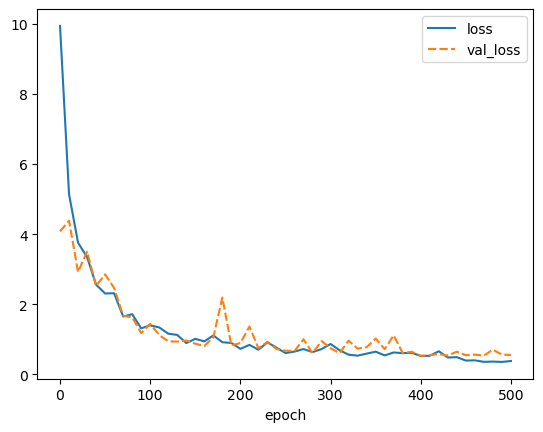

best weights loaded


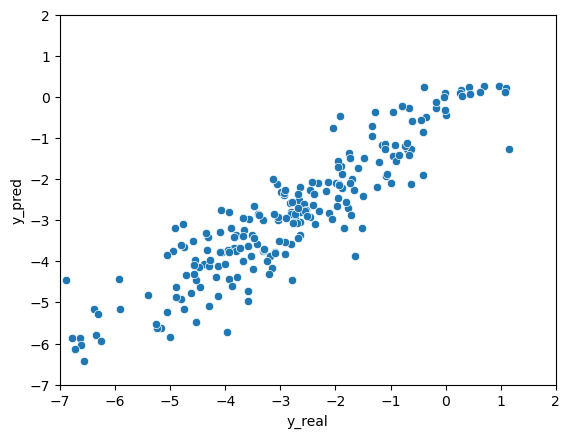

elapsed time: 152.7832944393158
run: 40
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC33DD90>, <torch.utils.data.dataset.Subset object at 0x0000024DB39745B0>, <torch.utils.data.dataset.Subset object at 0x0000024DB3974AC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.955203374226888 | Validation Loss 3.5868971943855286
Epoch 10 | Train Loss 3.040081258614858 | Validation Loss 2.4645638465881348
Epoch 20 | Train Loss 2.106415836016337 | Validation Loss 3.0008979439735413
Epoch 30 | Train Loss 1.9375587940216064 | Validation Loss 1.5753153562545776
Epoch 40 | Train Loss 1.6050413608551026 | Validation Loss 1.65796360373497
Epoch 50 | Train Loss 1.7711235523223876 | Validation Loss 2.2831351161003113
Epoch 60 | Train Loss 1.2463507572809855 | Validation Loss 1.2069915384054184
Epoch 70 | Train Loss 1.109473983446757 | Validation Loss 1.3082289397716522
Epoch 80 | Train Loss 0.9154436945915222 | Validation Loss 1.035230815410614
Epoch 90 | Train Loss 0.9106743097305298 | Validation Loss 1.2018481940031052
Epoch 100 | Train Loss 0.8579227089881897 | Validation Loss 0.8773784637451172
Epoch 110 | Train Loss 0.7086120784282685 | Validation Loss 0.8898716866970062
Epoch 120 | Train Loss 0.6648367802302043 | Validation Loss 0.77356640

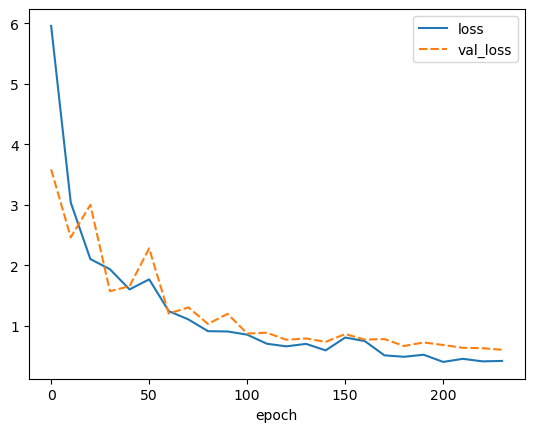

best weights loaded


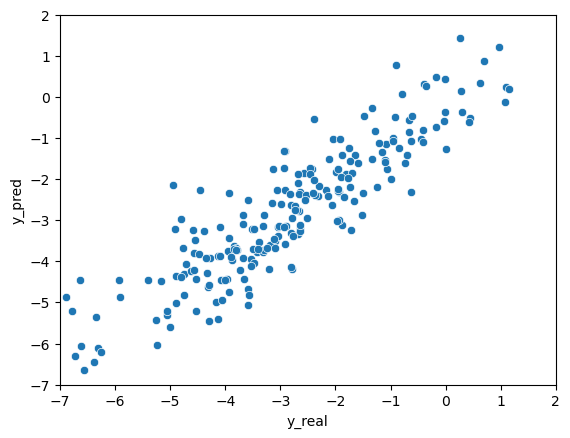

elapsed time: 66.14321637153625
run: 41
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57BAA9A0>, <torch.utils.data.dataset.Subset object at 0x0000024DEC39D3D0>, <torch.utils.data.dataset.Subset object at 0x0000024DEC39DD60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.494031898180643 | Validation Loss 4.5039783120155334
Epoch 10 | Train Loss 4.844032287597656 | Validation Loss 3.7059664726257324
Epoch 20 | Train Loss 4.383606243133545 | Validation Loss 3.449398934841156
Epoch 30 | Train Loss 4.075822353363037 | Validation Loss 3.4123881459236145
Epoch 40 | Train Loss 4.146512889862061 | Validation Loss 3.341681659221649
Epoch 50 | Train Loss 4.316895548502604 | Validation Loss 3.9721513986587524
Epoch 60 | Train Loss 3.7591666062672933 | Validation Loss 3.1262539625167847
Epoch 70 | Train Loss 4.084386889139811 | Validation Loss 3.0163907408714294
Epoch 80 | Train Loss 3.5740366061528523 | Validation Loss 2.9108195304870605
Epoch 90 | Train Loss 3.459207804997762 | Validation Loss 3.10042405128479
Epoch 100 | Train Loss 3.4736437161763507 | Validation Loss 2.907140791416168
Epoch 110 | Train Loss 3.113214445114136 | Validation Loss 2.689881384372711
Epoch 120 | Train Loss 3.006921100616455 | Validation Loss 2.9570908546447754


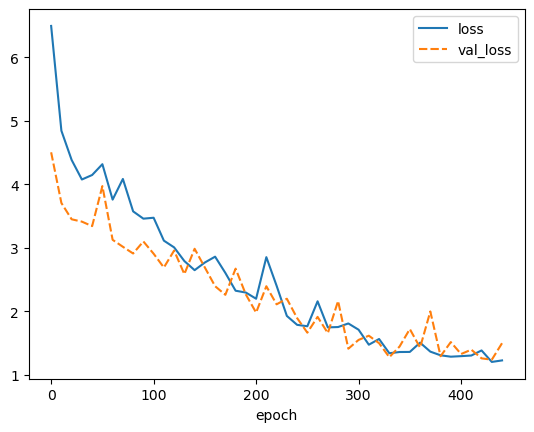

best weights loaded


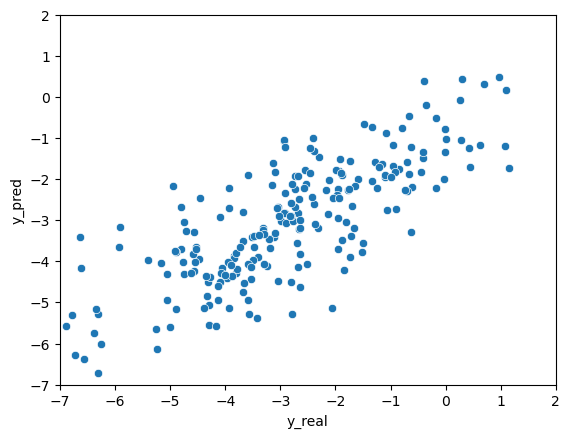

elapsed time: 135.49393343925476
run: 42
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3A3C7C0>, <torch.utils.data.dataset.Subset object at 0x0000024E579D7040>, <torch.utils.data.dataset.Subset object at 0x0000024E579D72B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.943236541748047 | Validation Loss 3.884743809700012
Epoch 10 | Train Loss 4.080987672011058 | Validation Loss 3.6230342388153076
Epoch 20 | Train Loss 3.7497794310251873 | Validation Loss 4.203168988227844
Epoch 30 | Train Loss 3.4472251892089845 | Validation Loss 2.801654815673828
Epoch 40 | Train Loss 3.117491277058919 | Validation Loss 2.9637851119041443
Epoch 50 | Train Loss 2.728290581703186 | Validation Loss 2.3924097418785095
Epoch 60 | Train Loss 2.5140711386998493 | Validation Loss 2.122730165719986
Epoch 70 | Train Loss 2.3494074900945026 | Validation Loss 2.04104146361351
Epoch 80 | Train Loss 2.126439905166626 | Validation Loss 2.6695175170898438
Epoch 90 | Train Loss 1.9000078201293946 | Validation Loss 1.7729436159133911
Epoch 100 | Train Loss 2.0747161944707235 | Validation Loss 1.6064161658287048
Epoch 110 | Train Loss 1.7412997325261435 | Validation Loss 1.6522011756896973
Epoch 120 | Train Loss 2.512572908401489 | Validation Loss 1.6443859636783

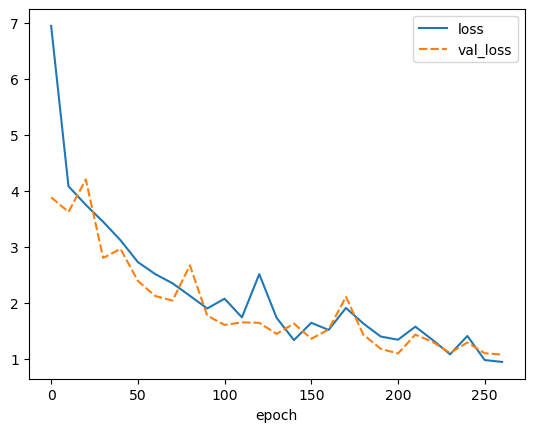

best weights loaded


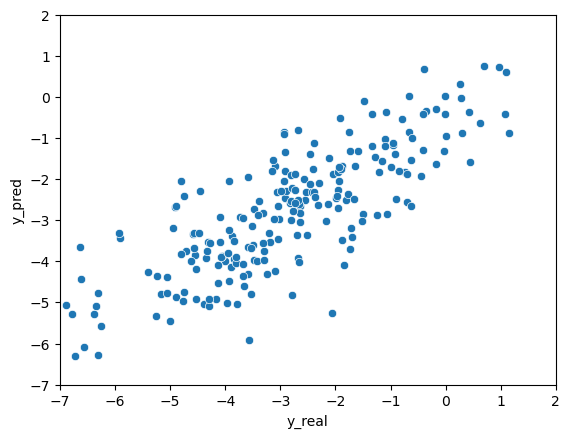

elapsed time: 82.27604126930237
run: 43
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB38C0640>, <torch.utils.data.dataset.Subset object at 0x0000024E57CEDD30>, <torch.utils.data.dataset.Subset object at 0x0000024E57CF3280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.932129001617431 | Validation Loss 3.5402827858924866
Epoch 10 | Train Loss 4.540801159540812 | Validation Loss 3.148300349712372
Epoch 20 | Train Loss 3.3404020150502522 | Validation Loss 2.5678272545337677
Epoch 30 | Train Loss 2.7665692647298177 | Validation Loss 2.5482387244701385
Epoch 40 | Train Loss 2.8242745955785113 | Validation Loss 2.141382247209549
Epoch 50 | Train Loss 2.2722139437993367 | Validation Loss 2.2046183347702026
Epoch 60 | Train Loss 2.041639041900635 | Validation Loss 2.159675717353821
Epoch 70 | Train Loss 1.8539323886235555 | Validation Loss 1.893214076757431
Epoch 80 | Train Loss 1.7450196981430053 | Validation Loss 2.1116403937339783
Epoch 90 | Train Loss 2.1599700689315795 | Validation Loss 1.5883038938045502
Epoch 100 | Train Loss 1.705912725130717 | Validation Loss 1.5390059053897858
Epoch 110 | Train Loss 2.201487914721171 | Validation Loss 1.6309287250041962
Epoch 120 | Train Loss 1.4657007376352946 | Validation Loss 1.4145926535

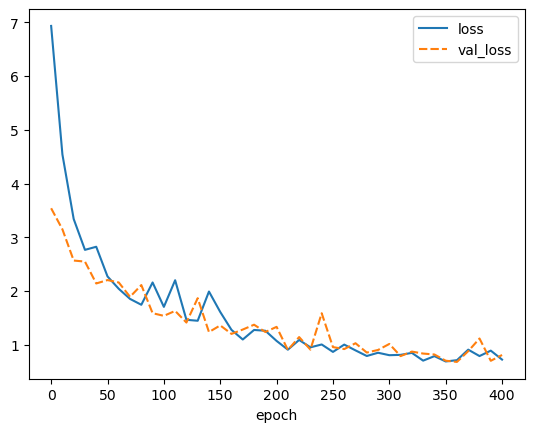

best weights loaded


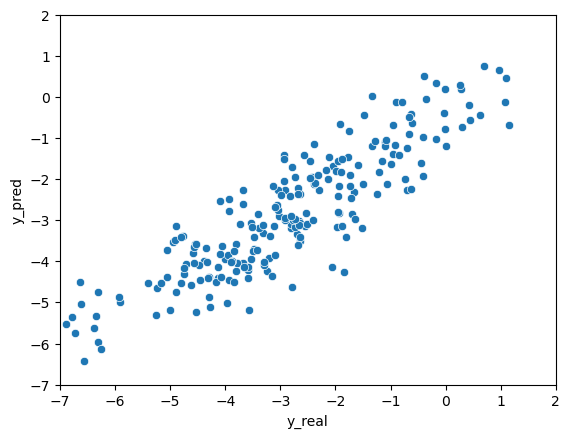

elapsed time: 140.87266373634338
run: 44
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC354C40>, <torch.utils.data.dataset.Subset object at 0x0000024DEC26F370>, <torch.utils.data.dataset.Subset object at 0x0000024E57A3A9A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.450016434987386 | Validation Loss 5.4863409996032715
Epoch 10 | Train Loss 4.633776728312174 | Validation Loss 3.405997335910797
Epoch 20 | Train Loss 3.7574079513549803 | Validation Loss 3.0205169320106506
Epoch 30 | Train Loss 2.751264492670695 | Validation Loss 2.6704707741737366
Epoch 40 | Train Loss 2.4647672533988954 | Validation Loss 2.3021408319473267
Epoch 50 | Train Loss 2.504732910792033 | Validation Loss 1.97458878159523
Epoch 60 | Train Loss 2.5284670273462932 | Validation Loss 1.82406947016716
Epoch 70 | Train Loss 1.4626443147659303 | Validation Loss 1.6199299991130829
Epoch 80 | Train Loss 1.537218169371287 | Validation Loss 1.6013851165771484
Epoch 90 | Train Loss 1.5187317530314128 | Validation Loss 1.4539503753185272
Epoch 100 | Train Loss 1.4838128606478374 | Validation Loss 1.7220101356506348
Epoch 110 | Train Loss 1.3253066460291545 | Validation Loss 2.2344245314598083
Epoch 120 | Train Loss 1.3765154639879862 | Validation Loss 1.78700888156

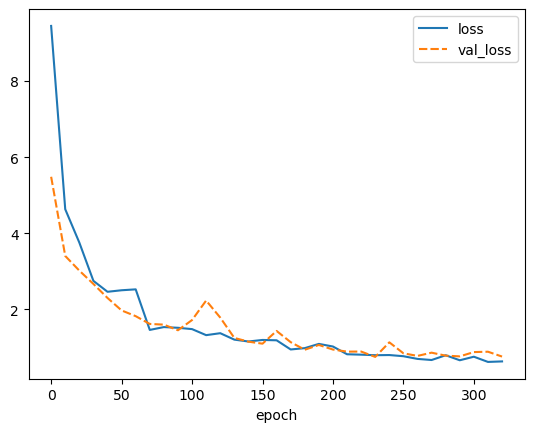

best weights loaded


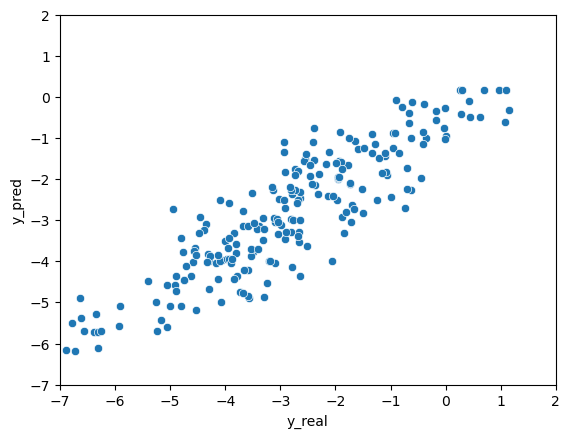

elapsed time: 103.22752952575684
run: 45
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3874070>, <torch.utils.data.dataset.Subset object at 0x0000024E57D04040>, <torch.utils.data.dataset.Subset object at 0x0000024E57D044F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.169762738545736 | Validation Loss 4.469223201274872
Epoch 10 | Train Loss 3.061746835708618 | Validation Loss 2.598653256893158
Epoch 20 | Train Loss 2.338265291849772 | Validation Loss 1.936440885066986
Epoch 30 | Train Loss 1.7980292240778606 | Validation Loss 2.0401654839515686
Epoch 40 | Train Loss 1.3185006737709046 | Validation Loss 1.4723407924175262
Epoch 50 | Train Loss 1.072343115011851 | Validation Loss 1.2708026766777039
Epoch 60 | Train Loss 0.9975327809651693 | Validation Loss 1.110216498374939
Epoch 70 | Train Loss 1.013660446802775 | Validation Loss 1.605408102273941
Epoch 80 | Train Loss 0.8471652289231618 | Validation Loss 2.08882999420166
Epoch 90 | Train Loss 0.9146000981330872 | Validation Loss 1.1080708652734756
Epoch 100 | Train Loss 0.9989553506175677 | Validation Loss 1.4197132289409637
Epoch 110 | Train Loss 0.6284794121980667 | Validation Loss 0.93585504591465
Epoch 120 | Train Loss 0.6684802452723185 | Validation Loss 0.894386515021324

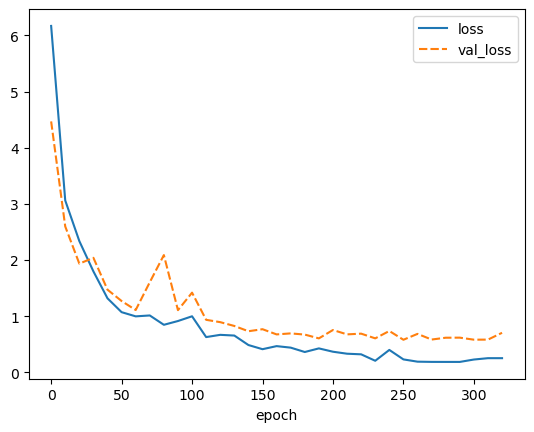

best weights loaded


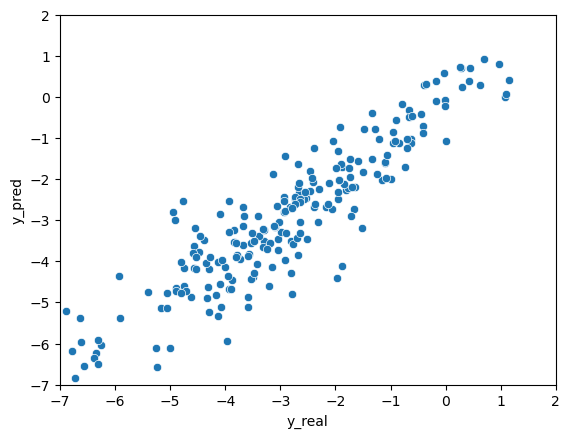

elapsed time: 99.02390813827515
run: 46
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4B997F0>, <torch.utils.data.dataset.Subset object at 0x0000024E579E3190>, <torch.utils.data.dataset.Subset object at 0x0000024E579E3790>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.644491990407308 | Validation Loss 4.521716594696045
Epoch 10 | Train Loss 4.813801081975301 | Validation Loss 3.61584609746933
Epoch 20 | Train Loss 4.264158976078034 | Validation Loss 4.4013450145721436
Epoch 30 | Train Loss 4.320624128977458 | Validation Loss 3.1145845651626587
Epoch 40 | Train Loss 4.532952817281087 | Validation Loss 3.723034918308258
Epoch 50 | Train Loss 3.819035847981771 | Validation Loss 3.1651527881622314
Epoch 60 | Train Loss 4.126368888219198 | Validation Loss 3.110884666442871
Epoch 70 | Train Loss 4.151584943135579 | Validation Loss 3.1176722049713135
Epoch 80 | Train Loss 3.612612311045329 | Validation Loss 3.6154178380966187
Epoch 90 | Train Loss 3.6400096734364826 | Validation Loss 2.9339122772216797
Epoch 100 | Train Loss 3.615520175298055 | Validation Loss 2.7734750509262085
Epoch 110 | Train Loss 3.426241985956828 | Validation Loss 2.8637325763702393
Epoch 120 | Train Loss 3.1081360896428425 | Validation Loss 3.0140663981437683


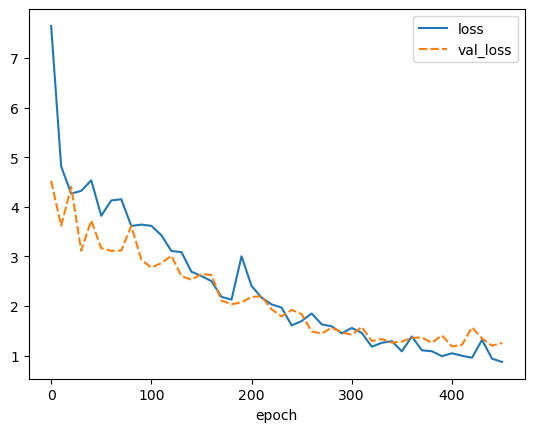

best weights loaded


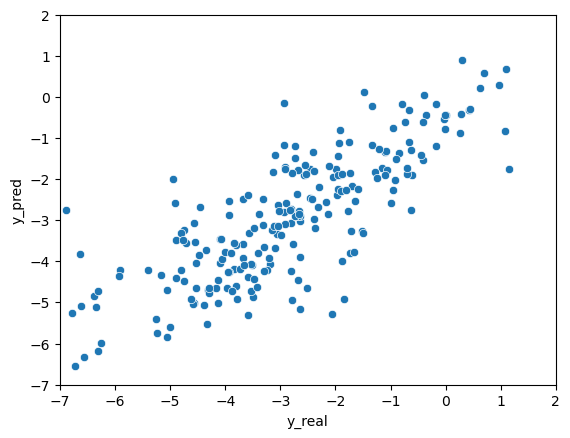

elapsed time: 150.4142405986786
run: 47
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3707550>, <torch.utils.data.dataset.Subset object at 0x0000024DE9EF4040>, <torch.utils.data.dataset.Subset object at 0x0000024DE9EF4370>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.016715621948242 | Validation Loss 3.962104082107544
Epoch 10 | Train Loss 4.4930536111195885 | Validation Loss 3.4094579219818115
Epoch 20 | Train Loss 4.251645723978679 | Validation Loss 3.325466811656952
Epoch 30 | Train Loss 3.4758802096048993 | Validation Loss 3.0150392055511475
Epoch 40 | Train Loss 3.187869675954183 | Validation Loss 3.8707765340805054
Epoch 50 | Train Loss 2.630434211095174 | Validation Loss 2.212665170431137
Epoch 60 | Train Loss 2.1871646483739218 | Validation Loss 1.96065092086792
Epoch 70 | Train Loss 1.9459240754445395 | Validation Loss 2.510436773300171
Epoch 80 | Train Loss 1.864587124188741 | Validation Loss 1.5751811265945435
Epoch 90 | Train Loss 1.885882278283437 | Validation Loss 2.607732832431793
Epoch 100 | Train Loss 1.9105558832486471 | Validation Loss 2.3464901745319366
Epoch 110 | Train Loss 1.4777212699254354 | Validation Loss 1.4371954798698425
Epoch 120 | Train Loss 1.5031067411104837 | Validation Loss 1.36059892177581

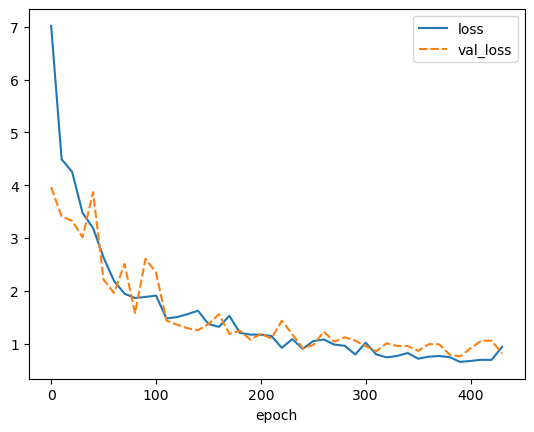

best weights loaded


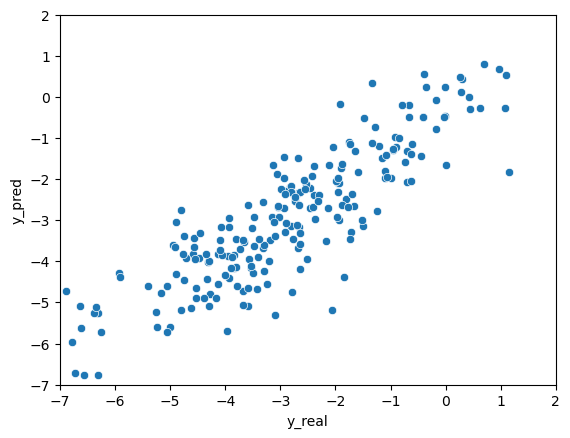

elapsed time: 138.85243725776672
run: 48
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB3980850>, <torch.utils.data.dataset.Subset object at 0x0000024DB39E8EB0>, <torch.utils.data.dataset.Subset object at 0x0000024DB39E8C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.823191579182943 | Validation Loss 5.577023863792419
Epoch 10 | Train Loss 4.503027359644572 | Validation Loss 5.6968196630477905
Epoch 20 | Train Loss 3.427884817123413 | Validation Loss 2.6410951614379883
Epoch 30 | Train Loss 2.552056582768758 | Validation Loss 2.413066804409027
Epoch 40 | Train Loss 2.479923137029012 | Validation Loss 2.160191923379898
Epoch 50 | Train Loss 2.138025991121928 | Validation Loss 2.799746036529541
Epoch 60 | Train Loss 2.277371040980021 | Validation Loss 2.8488208949565887
Epoch 70 | Train Loss 1.9847294807434082 | Validation Loss 1.5842310190200806
Epoch 80 | Train Loss 1.5919307748476663 | Validation Loss 1.6815608143806458
Epoch 90 | Train Loss 1.8111696402231852 | Validation Loss 1.4115577340126038
Epoch 100 | Train Loss 1.442945671081543 | Validation Loss 1.4520695507526398
Epoch 110 | Train Loss 1.4417322794596354 | Validation Loss 1.43812757730484
Epoch 120 | Train Loss 1.2470040996869405 | Validation Loss 1.087273165583610

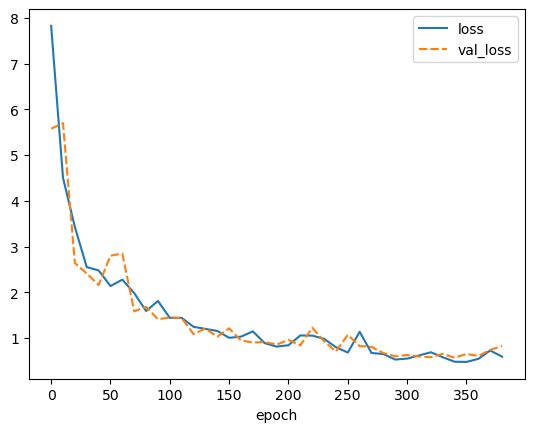

best weights loaded


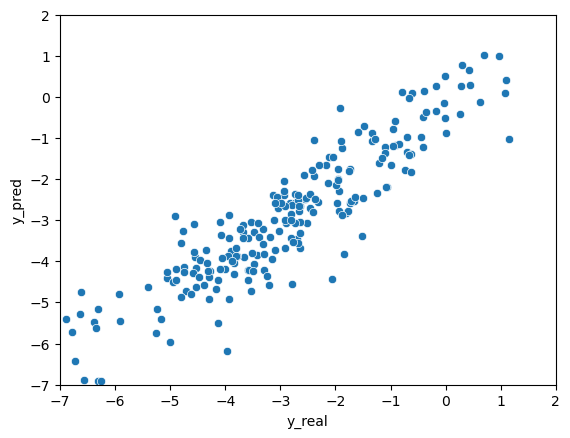

elapsed time: 124.51465249061584
run: 49
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>, <function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB38610A0>, <torch.utils.data.dataset.Subset object at 0x0000024E578F1100>, <torch.utils.data.dataset.Subset object at 0x0000024E578F15E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.802836068471273 | Validation Loss 4.029476344585419
Epoch 10 | Train Loss 4.661862468719482 | Validation Loss 3.5853230357170105
Epoch 20 | Train Loss 3.25020383199056 | Validation Loss 3.1319072246551514
Epoch 30 | Train Loss 2.7701812744140626 | Validation Loss 2.7421680092811584
Epoch 40 | Train Loss 2.2322718222935993 | Validation Loss 1.7637592554092407
Epoch 50 | Train Loss 1.7316566189130147 | Validation Loss 1.7187718152999878
Epoch 60 | Train Loss 1.5492833316326142 | Validation Loss 1.384923666715622
Epoch 70 | Train Loss 1.6383357683817545 | Validation Loss 2.2786620259284973
Epoch 80 | Train Loss 1.2007329225540162 | Validation Loss 1.3585500717163086
Epoch 90 | Train Loss 1.4378430604934693 | Validation Loss 1.6007241010665894
Epoch 100 | Train Loss 1.7277909199396768 | Validation Loss 1.3502186834812164
Epoch 110 | Train Loss 1.1893625338872273 | Validation Loss 1.357022762298584
Epoch 120 | Train Loss 1.2660099546114603 | Validation Loss 1.43453758

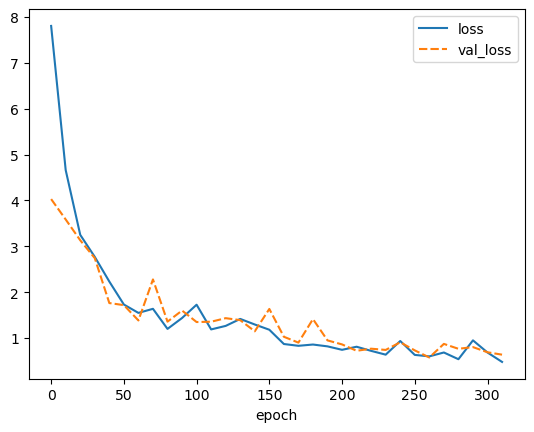

best weights loaded


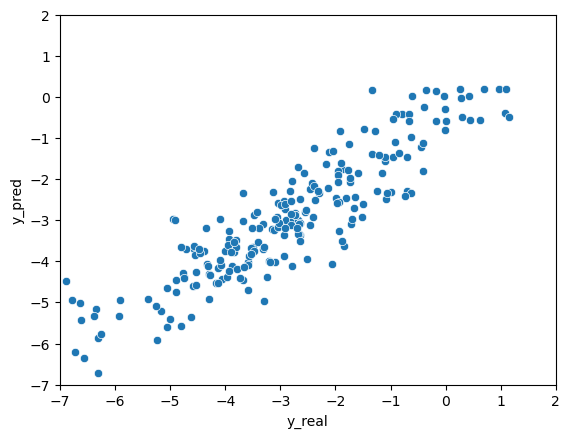

elapsed time: 108.00543332099915
run: 50
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57AC5910>, <torch.utils.data.dataset.Subset object at 0x0000024DB3A02AC0>, <torch.utils.data.dataset.Subset object at 0x0000024DB3A02FD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.285004901885986 | Validation Loss 3.7705060243606567
Epoch 10 | Train Loss 3.3386603355407716 | Validation Loss 2.95807945728302
Epoch 20 | Train Loss 2.5768353939056396 | Validation Loss 2.063389331102371
Epoch 30 | Train Loss 2.044050455093384 | Validation Loss 1.6593088805675507
Epoch 40 | Train Loss 1.5385377844174704 | Validation Loss 1.5368665158748627
Epoch 50 | Train Loss 1.6018155574798585 | Validation Loss 1.4819410145282745
Epoch 60 | Train Loss 1.207760504881541 | Validation Loss 1.6273767352104187
Epoch 70 | Train Loss 1.1696809530258179 | Validation Loss 2.185268998146057
Epoch 80 | Train Loss 1.0544920444488526 | Validation Loss 0.9955573678016663
Epoch 90 | Train Loss 1.2531610717376074 | Validation Loss 1.2268911004066467
Epoch 100 | Train Loss 1.1127309203147888 | Validation Loss 1.0863907933235168
Epoch 110 | Train Loss 0.9663672844568888 | Validation Loss 1.2030425667762756
Epoch 120 | Train Loss 0.7814619739850363 | Validation Loss 0.97373938

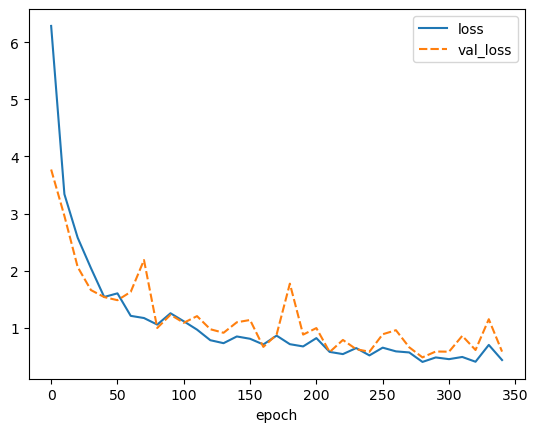

best weights loaded


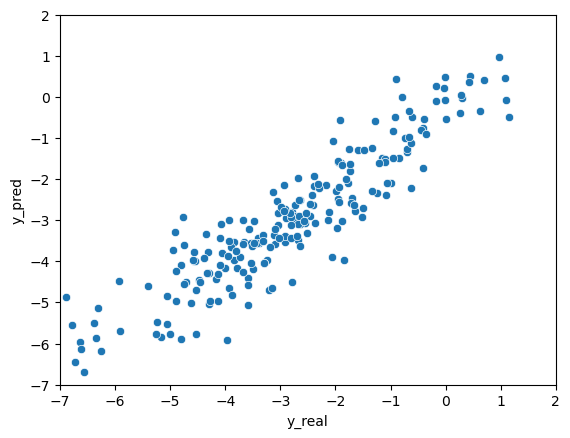

elapsed time: 109.27473831176758
run: 51
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57A2DD30>, <torch.utils.data.dataset.Subset object at 0x0000024DEC244880>, <torch.utils.data.dataset.Subset object at 0x0000024DEC244D90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.54257230758667 | Validation Loss 3.7728360295295715
Epoch 10 | Train Loss 4.868499755859375 | Validation Loss 3.7073644399642944
Epoch 20 | Train Loss 4.419989315668742 | Validation Loss 3.8186655044555664
Epoch 30 | Train Loss 4.018066263198852 | Validation Loss 3.4161282181739807
Epoch 40 | Train Loss 3.787493189175924 | Validation Loss 3.426441729068756
Epoch 50 | Train Loss 3.9073623339335124 | Validation Loss 3.3500019311904907
Epoch 60 | Train Loss 3.98390752474467 | Validation Loss 3.259071171283722
Epoch 70 | Train Loss 3.748953406016032 | Validation Loss 3.3138784170150757
Epoch 80 | Train Loss 3.787634086608887 | Validation Loss 3.1014896631240845
Epoch 90 | Train Loss 3.539188766479492 | Validation Loss 3.410455346107483
Epoch 100 | Train Loss 3.417488431930542 | Validation Loss 2.7795243859291077
Epoch 110 | Train Loss 3.182411003112793 | Validation Loss 2.9581180810928345
Epoch 120 | Train Loss 3.137184206644694 | Validation Loss 3.177289128303528
Ep

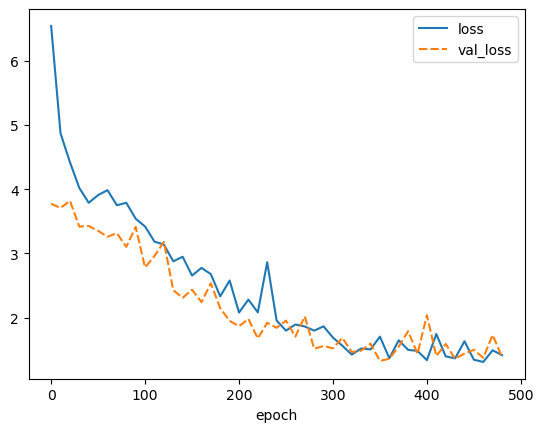

best weights loaded


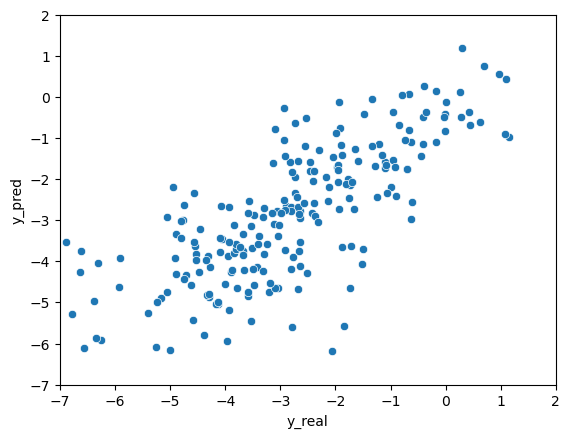

elapsed time: 167.96005654335022
run: 52
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57C76E50>, <torch.utils.data.dataset.Subset object at 0x0000024E57B0B9D0>, <torch.utils.data.dataset.Subset object at 0x0000024E57B0B370>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.294079271952311 | Validation Loss 5.877526879310608
Epoch 10 | Train Loss 4.231636238098145 | Validation Loss 4.834859251976013
Epoch 20 | Train Loss 4.213229831059774 | Validation Loss 3.4662216305732727
Epoch 30 | Train Loss 3.9177690823872884 | Validation Loss 3.1565391421318054
Epoch 40 | Train Loss 2.9525151014328004 | Validation Loss 2.7649125456809998
Epoch 50 | Train Loss 2.3807215332984923 | Validation Loss 2.7901265621185303
Epoch 60 | Train Loss 2.1776947259902952 | Validation Loss 1.9521090984344482
Epoch 70 | Train Loss 2.220083737373352 | Validation Loss 3.037722110748291
Epoch 80 | Train Loss 2.0555838346481323 | Validation Loss 3.3194292783737183
Epoch 90 | Train Loss 1.8344266653060912 | Validation Loss 1.6630237102508545
Epoch 100 | Train Loss 2.2265148639678953 | Validation Loss 4.238729298114777
Epoch 110 | Train Loss 1.6889255404472352 | Validation Loss 1.5835281312465668
Epoch 120 | Train Loss 1.9015817483266195 | Validation Loss 1.464725613

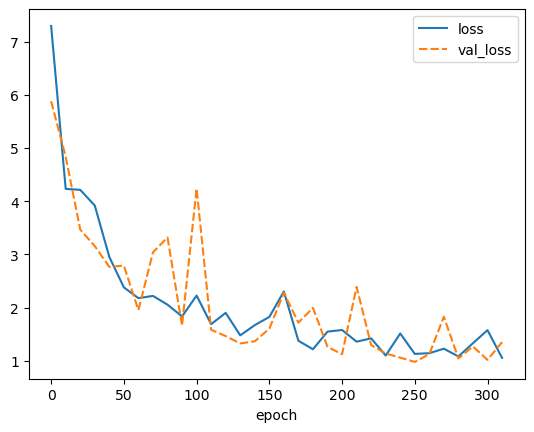

best weights loaded


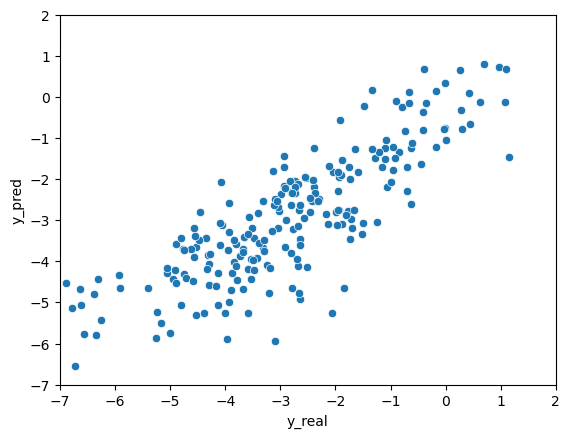

elapsed time: 102.10101008415222
run: 53
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57C494F0>, <torch.utils.data.dataset.Subset object at 0x0000024DEC3A8070>, <torch.utils.data.dataset.Subset object at 0x0000024DEC3A82E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.772410360972087 | Validation Loss 4.2952717542648315
Epoch 10 | Train Loss 4.274759944279989 | Validation Loss 3.559969961643219
Epoch 20 | Train Loss 3.6167987028757733 | Validation Loss 2.790845215320587
Epoch 30 | Train Loss 2.682075734933217 | Validation Loss 2.878371238708496
Epoch 40 | Train Loss 2.486075150966644 | Validation Loss 1.9921326637268066
Epoch 50 | Train Loss 2.6204947233200073 | Validation Loss 2.112441122531891
Epoch 60 | Train Loss 1.9522943099339802 | Validation Loss 2.307460069656372
Epoch 70 | Train Loss 1.7826243082682292 | Validation Loss 2.158047318458557
Epoch 80 | Train Loss 1.6799145857493083 | Validation Loss 1.271775707602501
Epoch 90 | Train Loss 1.5884869813919067 | Validation Loss 1.5678274929523468
Epoch 100 | Train Loss 1.6072187145551047 | Validation Loss 1.3427221029996872
Epoch 110 | Train Loss 1.308457350730896 | Validation Loss 1.480452984571457
Epoch 120 | Train Loss 1.3518065690994263 | Validation Loss 1.05429841578006

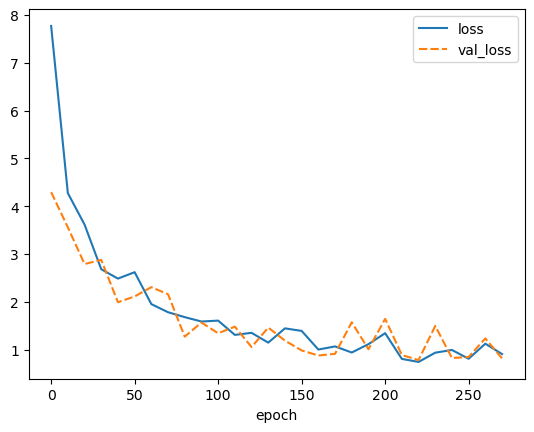

best weights loaded


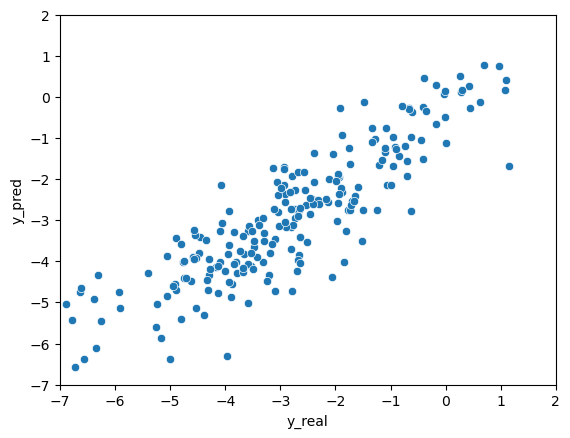

elapsed time: 89.05133891105652
run: 54
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000024DB09199D0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DEC339D60>, <torch.utils.data.dataset.Subset object at 0x0000024E57B0B580>, <torch.utils.data.dataset.Subset object at 0x0000024E579F3BB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 11.431341075897217 | Validation Loss 4.377941787242889
Epoch 10 | Train Loss 4.152580650647481 | Validation Loss 4.7336596846580505
Epoch 20 | Train Loss 3.735175689061483 | Validation Loss 3.5066272616386414
Epoch 30 | Train Loss 3.66426518758138 | Validation Loss 2.984774351119995
Epoch 40 | Train Loss 2.8313814640045165 | Validation Loss 2.2070895731449127
Epoch 50 | Train Loss 1.9967088143030802 | Validation Loss 3.280568242073059
Epoch 60 | Train Loss 1.8518612066904703 | Validation Loss 2.136089563369751
Epoch 70 | Train Loss 1.8591437896092733 | Validation Loss 1.7277986407279968
Epoch 80 | Train Loss 1.587917407353719 | Validation Loss 1.366330862045288
Epoch 90 | Train Loss 1.207342396179835 | Validation Loss 1.1529435813426971
Epoch 100 | Train Loss 2.005417784055074 | Validation Loss 1.9863185584545135
Epoch 110 | Train Loss 1.0880191008249918 | Validation Loss 1.3834527730941772
Epoch 120 | Train Loss 1.199641497929891 | Validation Loss 1.09852065145969

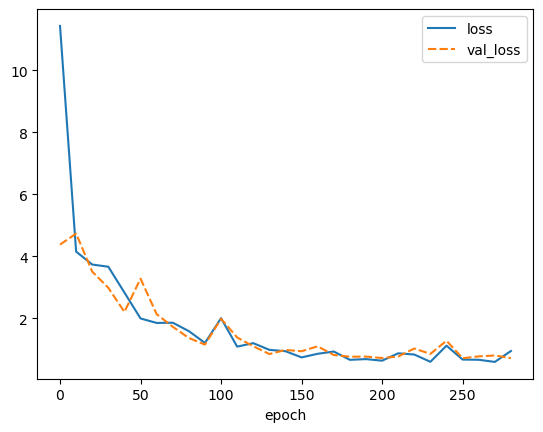

best weights loaded


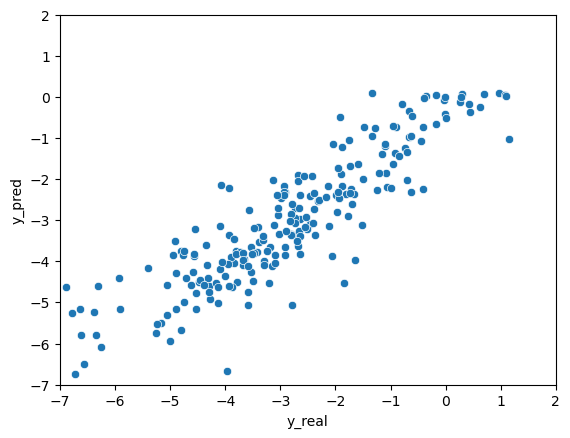

elapsed time: 93.35448551177979
run: 55
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57A287F0>, <torch.utils.data.dataset.Subset object at 0x0000024DB36353D0>, <torch.utils.data.dataset.Subset object at 0x0000024DB36358E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.698892641067505 | Validation Loss 4.248534202575684
Epoch 10 | Train Loss 2.9289881865183514 | Validation Loss 2.2233023941516876
Epoch 20 | Train Loss 2.833393802245458 | Validation Loss 1.9933596551418304
Epoch 30 | Train Loss 1.84338481426239 | Validation Loss 2.358048379421234
Epoch 40 | Train Loss 1.4752537806828816 | Validation Loss 1.6968159973621368
Epoch 50 | Train Loss 1.1494441747665405 | Validation Loss 1.4348770678043365
Epoch 60 | Train Loss 1.0384494185447692 | Validation Loss 1.307159662246704
Epoch 70 | Train Loss 0.9919763485590617 | Validation Loss 1.567570835351944
Epoch 80 | Train Loss 0.9789552172025044 | Validation Loss 1.1053327023983002
Epoch 90 | Train Loss 0.8041760126749674 | Validation Loss 0.9008619338274002
Epoch 100 | Train Loss 0.6449848135312398 | Validation Loss 0.8392561674118042
Epoch 110 | Train Loss 0.6946517825126648 | Validation Loss 0.8901871144771576
Epoch 120 | Train Loss 0.6938214898109436 | Validation Loss 0.984119594

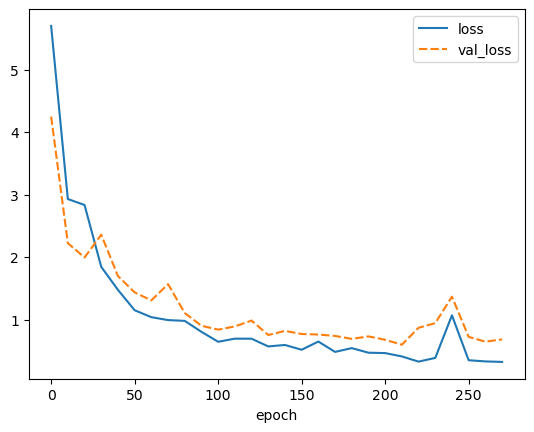

best weights loaded


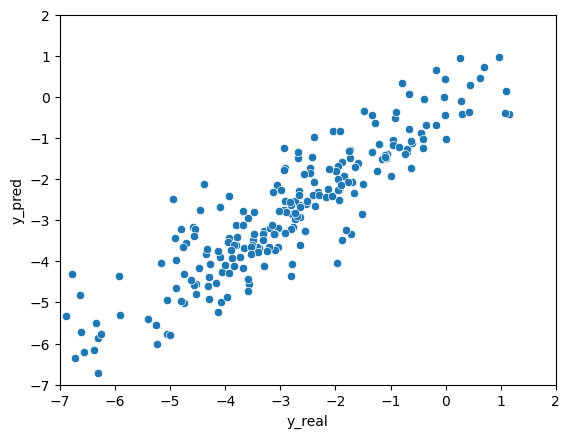

elapsed time: 85.90531778335571
run: 56
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E57A28A90>, <torch.utils.data.dataset.Subset object at 0x0000024E57D52790>, <torch.utils.data.dataset.Subset object at 0x0000024E57D52CA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.078528753916422 | Validation Loss 4.061518907546997
Epoch 10 | Train Loss 4.914879687627157 | Validation Loss 3.628417134284973
Epoch 20 | Train Loss 4.326763979593912 | Validation Loss 3.4045770168304443
Epoch 30 | Train Loss 4.04150128364563 | Validation Loss 3.3180630803108215
Epoch 40 | Train Loss 4.020161652565003 | Validation Loss 3.373550295829773
Epoch 50 | Train Loss 3.965592130025228 | Validation Loss 3.643215835094452
Epoch 60 | Train Loss 4.021576054890951 | Validation Loss 3.3119210600852966
Epoch 70 | Train Loss 3.648405154546102 | Validation Loss 3.176394462585449
Epoch 80 | Train Loss 3.6524314562479656 | Validation Loss 2.929883897304535
Epoch 90 | Train Loss 3.6384496370951336 | Validation Loss 2.956211507320404
Epoch 100 | Train Loss 3.6584505240122476 | Validation Loss 2.832533597946167
Epoch 110 | Train Loss 3.1637254397074384 | Validation Loss 2.9441051483154297
Epoch 120 | Train Loss 2.9751574198404946 | Validation Loss 2.784121572971344
Ep

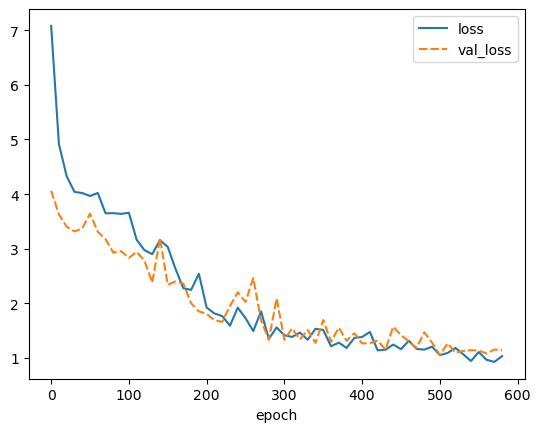

best weights loaded


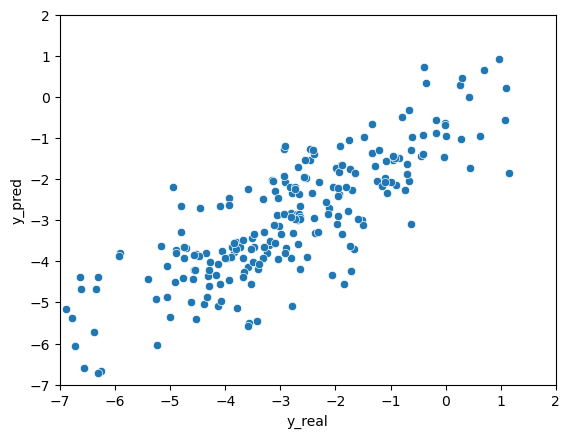

elapsed time: 198.34461188316345
run: 57
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB36D8190>, <torch.utils.data.dataset.Subset object at 0x0000024DB3623040>, <torch.utils.data.dataset.Subset object at 0x0000024DB36231C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.288557068506877 | Validation Loss 3.9747575521469116
Epoch 10 | Train Loss 4.572303660710653 | Validation Loss 4.846237599849701
Epoch 20 | Train Loss 4.039927085240682 | Validation Loss 4.6204811334609985
Epoch 30 | Train Loss 3.254685322443644 | Validation Loss 3.1032715439796448
Epoch 40 | Train Loss 2.9515633742014566 | Validation Loss 2.7776184678077698
Epoch 50 | Train Loss 2.5640524705251058 | Validation Loss 2.141498029232025
Epoch 60 | Train Loss 2.4323756138483685 | Validation Loss 2.2927573323249817
Epoch 70 | Train Loss 2.570023043950399 | Validation Loss 2.020735114812851
Epoch 80 | Train Loss 2.1344258626302084 | Validation Loss 1.9864168763160706
Epoch 90 | Train Loss 1.9576116720835368 | Validation Loss 2.1108939051628113
Epoch 100 | Train Loss 1.8134556849797567 | Validation Loss 1.815185010433197
Epoch 110 | Train Loss 2.315832765897115 | Validation Loss 1.7397204041481018
Epoch 120 | Train Loss 1.9413241783777873 | Validation Loss 1.77293416857

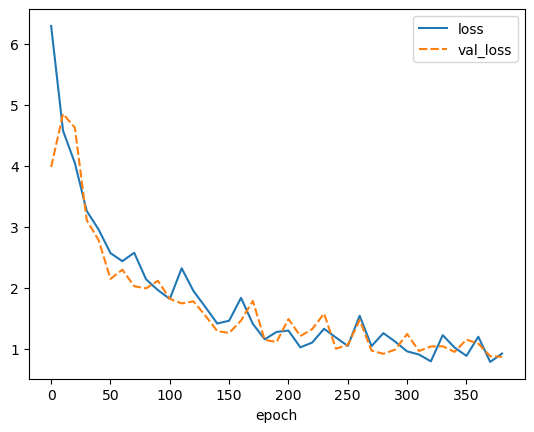

best weights loaded


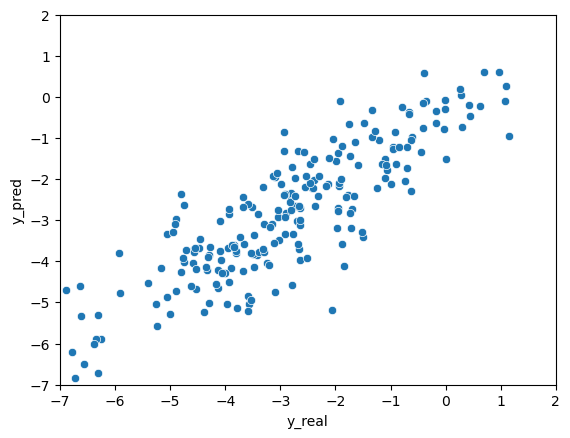

elapsed time: 135.44840931892395
run: 58
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024DB4BD66D0>, <torch.utils.data.dataset.Subset object at 0x0000024E57D742B0>, <torch.utils.data.dataset.Subset object at 0x0000024E57D747C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.509063323338826 | Validation Loss 4.49254035949707
Epoch 10 | Train Loss 3.9011446952819826 | Validation Loss 3.288433849811554
Epoch 20 | Train Loss 3.1103944698969523 | Validation Loss 2.6225101351737976
Epoch 30 | Train Loss 2.837739578882853 | Validation Loss 2.8386080861091614
Epoch 40 | Train Loss 2.543583552042643 | Validation Loss 2.3283954858779907
Epoch 50 | Train Loss 2.429888892173767 | Validation Loss 1.9804126620292664
Epoch 60 | Train Loss 2.0755517959594725 | Validation Loss 1.9495435953140259
Epoch 70 | Train Loss 2.0316426038742064 | Validation Loss 2.2017731368541718
Epoch 80 | Train Loss 1.9067585865656536 | Validation Loss 1.6331685781478882
Epoch 90 | Train Loss 2.0509344577789306 | Validation Loss 1.8944474160671234
Epoch 100 | Train Loss 1.7615844845771789 | Validation Loss 1.7337348461151123
Epoch 110 | Train Loss 1.6750413576761882 | Validation Loss 1.492149442434311
Epoch 120 | Train Loss 1.626769596338272 | Validation Loss 1.4358393549

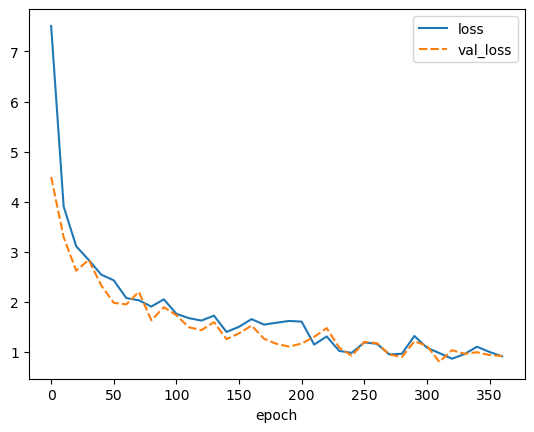

best weights loaded


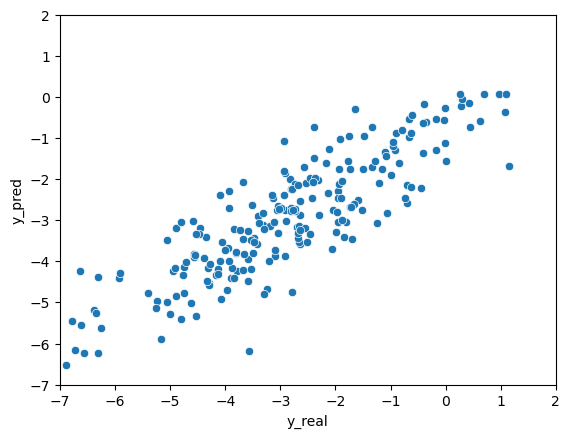

elapsed time: 119.0379433631897
run: 59
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000024DB09363A0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000024E578E35E0>, <torch.utils.data.dataset.Subset object at 0x0000024E577FFD30>, <torch.utils.data.dataset.Subset object at 0x0000024E577FFA30>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.007671991984049 | Validation Loss 8.77075445652008
Epoch 10 | Train Loss 4.176313273111979 | Validation Loss 3.705031454563141
Epoch 20 | Train Loss 3.6349230766296388 | Validation Loss 2.810459852218628
Epoch 30 | Train Loss 3.352355225880941 | Validation Loss 2.4098970890045166
Epoch 40 | Train Loss 2.3308435916900634 | Validation Loss 1.983510673046112
Epoch 50 | Train Loss 2.029553850491842 | Validation Loss 1.8102215230464935
Epoch 60 | Train Loss 2.1351431369781495 | Validation Loss 1.5805069208145142
Epoch 70 | Train Loss 1.5561131954193115 | Validation Loss 1.4227344393730164
Epoch 80 | Train Loss 1.9417894283930461 | Validation Loss 1.4732008278369904
Epoch 90 | Train Loss 2.441141867637634 | Validation Loss 1.8963477611541748
Epoch 100 | Train Loss 1.3212600509325663 | Validation Loss 1.2803900986909866
Epoch 110 | Train Loss 1.3000393549601237 | Validation Loss 1.2569890916347504
Epoch 120 | Train Loss 1.3434599757194519 | Validation Loss 1.36766475439

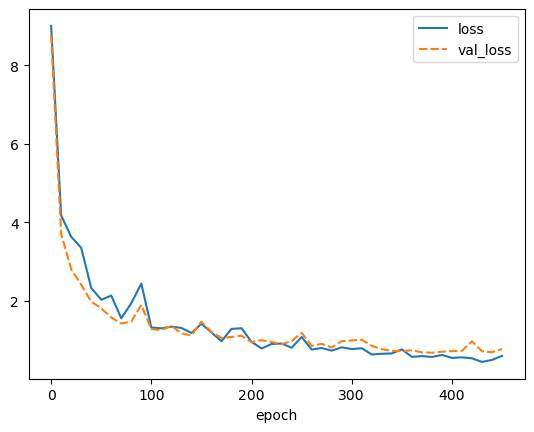

best weights loaded


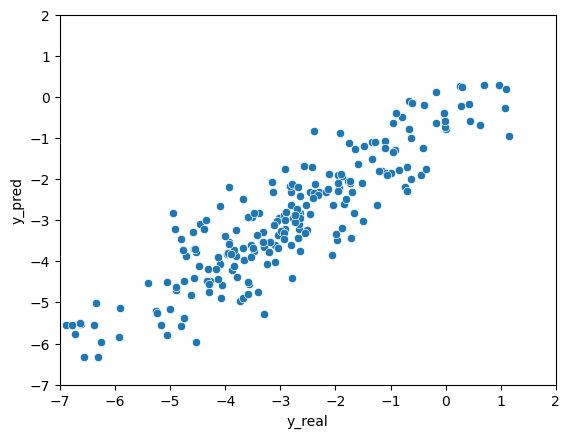

elapsed time: 155.5014510154724


In [14]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])

        permute_index=combination_dict["permute_layer_list"]
        pre_act_permute_gcn=combination_dict["pre_act_permute_gcn_list"]
        post_act_permute_gcn=combination_dict["post_act_permute_gcn_list"]
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate, permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, test_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names

        save_dict["permute_index"] = permute_index
        save_dict["pre_act_permute_gcn"] = pre_act_permute_gcn
        save_dict["post_act_permute_gcn"] = post_act_permute_gcn


    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    